# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong and Hongyonggi
                                                 
변수 선언 및 실행 함수는 아래 있음.

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pprint
from collections import OrderedDict

In [2]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
# dat_list.append(list(chunks(dat_list_pre, 3)))
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [3]:
# 차원 축소 함수
# dat_list = list(itertools.chain(*dat_list))
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                    #print("e-06 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                    #print("e-05 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                    #print("e-04 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                    #print("e-03 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                    #print("e-02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                    #print("e-01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                    #print("e+00 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                    #print("e+01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                    #print("e+02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                    #print("e+03 complete")
    #print("Complete") 
    #print("=================")
    return dat_list_xyz

In [4]:
#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                for l in range(20):
                    if(l < 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                            #print(dat_list_xyz[i][j][k])
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                    elif(l >= 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                        
                
               
    return dat_list_xyz

In [5]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(디텍터 갯수, 크리스탈의 x축 갯수, 크리스탈의 y축 갯수, 크리스탈의 z축 갯수, 원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(detector_amount, crystal_x_amount, crystal_y_amount, crystal_z_amount, r, x_len, y_len, z_len):
    
    r = r-(x_len/2)
    
    
    result = []
    for i in range(int(detector_amount)):
        detector = []
        crystal = []
        crystal_z_num = int((int(crystal_z_amount)/2))
        for j in range(int(crystal_z_amount)):
            
            crystal_y_num = int((int(crystal_y_amount)/2))
            for k in range(int(crystal_y_amount)):
                crystal.append([r + (x_len/2), (y_len * crystal_y_num), (z_len * -crystal_z_num)])
                crystal_y_num = crystal_y_num - 1
            crystal_z_num = crystal_z_num - 1
        detector.append(crystal)
        result.append(detector)
    result = list(itertools.chain(*result))
    detector_rot = result
    result = []
    
    detector_num = 0
    for i in range(int(detector_amount)):
        det_rot = []
        for j in range(len(detector_rot[i])):
            det_rot.append([format((detector_rot[i][j][0]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)) - (detector_rot[i][j][1]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format((detector_rot[i][j][0]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)) + (detector_rot[i][j][1]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format(detector_rot[i][j][2],".3f")])
        detector_num += 1
        result.append(det_rot)
    
            
    
    return result

In [6]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_crystal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

In [7]:
def rotate_edge(crystal_edge, detector_num):
    rotate_crystal_edge_1 = []
    rad = (math.pi/180) 
    for i in range(detector_num):
        for j in range(len(crystal_edge)):
            for k in range(len(crystal_edge[j])):
                rotate_crystal_edge_1.append([(crystal_edge[j][k][0]*math.cos((((360/detector_num))*i)*rad)) - (crystal_edge[j][k][1]*math.sin((((360/detector_num))*i)*rad)),\
                                               (crystal_edge[j][k][0]*math.sin((((360/detector_num))*i)*rad)) + (crystal_edge[j][k][1]*math.cos((((360/detector_num))*i)*rad)),\
                                                crystal_edge[j][k][2]])
            
    return rotate_crystal_edge_1

In [8]:
def rotate_edge_yss(x, y, z, angle):
    rotate_crystal_edge_1 = []
    x = float(x)
    y = float(y)
    z = float(z)
    rad = (math.pi/180)
    rotate_crystal_edge_1.append([(x*math.cos(angle * rad)) - (y*math.sin(angle * rad)),\
                               (x*math.sin(angle * rad)) + (y*math.cos(angle * rad)),\
                                z])
    return rotate_crystal_edge_1


In [9]:
# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_number = []
    global det_mat
    det_mat = []
    
    
    
    # l = coincidence 갯수
    for l in tqdm.tqdm(range(len(dat_list))):
        
        detector_num = []
        sort_data_1 = []
        test=0
        # m = 2 (single 갯수)
        for m in range(len(dat_list[l])):
            # 여기까지 데이터 읽어오기
            
            for i in range(len(rotate_crystal_edge_chunks)):
                # 디텍터 헤드 갯수
                
                x_max = -1000
                x_min = 1000
                y_max = -1000
                y_min = 1000
                z_max = -1000
                z_min = 1000
                for j in range(len(rotate_crystal_edge_chunks[i])):
                    # 크리스탈 갯수
                    for k in range(len(rotate_crystal_edge_chunks[i][j])):
                        # 모서리 갯수
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                            x_max = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                            x_min = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                            y_max = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                            y_min = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) > z_max):
                            z_max = rotate_crystal_edge_chunks[i][j][k][2]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) < z_min):
                            z_min = rotate_crystal_edge_chunks[i][j][k][2]
                    
                

                        
                #data = rotate_edge_yss([l][m][0],sort_dat[idx][1],sort_dat[idx][2],(360-(angle*int(detector_n))))        
                        
                if(float(dat_list[l][m][0])>=x_min and float(dat_list[l][m][0])<x_max and float(dat_list[l][m][1])>=y_min and float(dat_list[l][m][1])<y_max and float(dat_list[l][m][2])>=z_min and float(dat_list[l][m][2])<z_max):
                   
                    test += 1
                    detector_num.append(i)
                    sort_data_1.append(dat_list[l][m])

                    #if(i!=test):
                        #print(i)
                    break
                    
                    
                                    
    #    print("test:",test)

        
    # 버려지는 데이터들이 있어서 쌍이 있는 데이터들만 남기겠다.
    # 여기서 엄청많이 버려진다 데이터가....
    # 2019.03.20 --> detector_num 의 갯수가 2개가 아니여서 이상하게 나오는거였다!!
        #if(len(detector_num)==2):
        if(l%1000 == 0):
            print('event_num:',l,'sort_data_1:',sort_data_1)
            print('detector_num:',detector_num)
            print('==================================')
        sort_data.append(sort_data_1)
        detector_number.append(detector_num)

    
    print("detector_number:",len(detector_number))
    return detector_number

In [20]:
# 정렬된 데이터와 디텍터 번호를 받아와 티텍터의 회전각만큼 회전변환을 통해 중심값으로 변경시키는 함수
# rotate_detector(정렬된 데이터, 디텍터 번호가 적힌 리스트, 디텍터 갯수)
def rotate_detector(sort_dat, detector_number_list, detector_num, rotate_crystal_edge_chunks):
    a = 0
    b = 0
    c = 0
    after_data = 0
    
    global w_data
    global w_after_data
    w_data = []
    w_after_data = []
    
    final_dat = []
    angle = 360/int(detector_num)
    print("angle:",angle)
    for idx,detector_n in enumerate(detector_number_list):
        
        data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],(360-(angle*int(detector_n))))
        
        
        
        
        for i in range(len(rotate_crystal_edge_chunks[0])):
            x_max = -1000
            x_min = 1000
            y_max = -1000
            y_min = 1000
            z_max = -1000
            z_min = 1000
            for j in range(len(rotate_crystal_edge_chunks[0])):
                for k in range(len(rotate_crystal_edge_chunks[0][i])):
                    # 모서리 개수
                    if(float(rotate_crystal_edge_chunks[0][i][k][0]) > x_max):
                        x_max = rotate_crystal_edge_chunks[0][i][k][0]
                    if(float(rotate_crystal_edge_chunks[0][i][k][0]) < x_min):
                        x_min = rotate_crystal_edge_chunks[0][i][k][0]
                    if(float(rotate_crystal_edge_chunks[0][i][k][1]) > y_max):
                        y_max = rotate_crystal_edge_chunks[0][i][k][1]
                    if(float(rotate_crystal_edge_chunks[0][i][k][1]) < y_min):
                        y_min = rotate_crystal_edge_chunks[0][i][k][1]
                    if(float(rotate_crystal_edge_chunks[0][i][k][2]) > z_max):
                        z_max = rotate_crystal_edge_chunks[0][i][k][2]
                    if(float(rotate_crystal_edge_chunks[0][i][k][2]) < z_min):
                        z_min = rotate_crystal_edge_chunks[0][i][k][2]

           

            if(c == 0):
                print("=====",i,"=====")
                print(x_min,"<=x<",x_max)
                print(y_min,"<=y<",y_max)
                print(z_min,"<=z<",z_max)
                print("============")
            # 여기서 범위지정이 뭔가 이상해서 결과가 안나온다.
                if(float(data[0][0])>=x_min and float(data[0][0])<x_max and float(data[0][1])>=y_min and float(data[0][1])<y_max and float(data[0][2])>=z_min and float(data[0][2])<z_max):
                    after_data = rotate_edge_yss(crystal_location[0][i][0],crystal_location[0][i][1],crystal_location[0][i][2],(angle*int(detector_n)))
                    a = a+1
                    final_dat.append(after_data)
                    break
                else:
                    if(i==0):
                        print("잘못된 데이터 --> idx:",idx,'   raw_data:',sort_dat[idx],'  0_data:',data,'   after_data:',after_data)
            #else:
                #w_data.append(['idx:',idx,'detector_n',detector_n,'data',data])
                #w_after_data.append(['idx:',idx,'detector_n:',detector_n,'after_data:',rotate_edge_yss(crystal_location[0][i][0],crystal_location[0][i][1],crystal_location[0][i][2], 360-(angle*int(detector_n)))])
                #b += 1
        c += 1       
    print("전체 데이터:",len(sort_dat))
    print("범위 내의 값:",a)                    
    #print("범위 밖의 값:",b)
    print("=================")

    return final_dat
                

In [11]:
def start_preprocessing(detector_head_num, crystal_x_num, crystal_y_num, crystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len):
    dat_list_all = []
    dat_list_pre = []
    dat_list = []
    dat_list_xyz_1 = []
    global sort_data
    global detector_num
    global origin_crystal_edge
    global crystal_location


    #print("--------------" + dat_file_list[i]) + "----------------")
    print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
    for i in range(len(dat_file_list)):
        idx = 0
        print(str(i+1) + "번째 파일")
        txt_data = open(dat_dir+dat_file_list[i],'r')
        for j in txt_data:
            j = " ".join(j.split())
            j = j.split(" ")
            dat_list_all.append(j)
            #print(dat_list_all)

    print("=================")
    
    dat_len = len(dat_list_all) - 1
    
    for i in range(len(dat_list_all) -1):
        #print(i)
        dat_list_pre.append(dat_list_all[i][8])
        dat_list_pre.append(dat_list_all[i][9])
        dat_list_pre.append(dat_list_all[i][10])
        dat_list_pre.append(dat_list_all[i][31])
        dat_list_pre.append(dat_list_all[i][32])
        dat_list_pre.append(dat_list_all[i][33])

    dat_list.append(list(chunks(dat_list_pre, 3)))
    dat_list = list(itertools.chain(*dat_list))
    dat_list_xyz_1.append(list(chunks(dat_list,2)))
    dat_list_xyz_1 = list(itertools.chain(*dat_list_xyz_1))

    print("좌표 가져오기 완료!")
    print("=================")
    txt_data.close()
    
    # 실제 데이터를 form에 맞게 수정
    global dat_list_xyz
    dat_list_xyz = make_form(dat_list_xyz_1, dat_len)
    
    #print(dat_list_xyz)
    
    # 각 크리스탈의 중심값 찾기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이(원점으로부터 헤드까지 거리), 크리스탈의 x_len(cm), y_len(cm), z_len(cm))

    crystal_location = YSS_find_xyz_center(detector_head_num, crystal_x_num, crystal_y_num, crystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)
    print("0번 디텍터 크리스탈 중심값:",crystal_location[0])
    print("중간지점 디텍터 인덱스:",int(detector_head_num)/2)
    print("중간지점 디텍터 중심값:", crystal_location[int(detector_head_num/2)])
    # 각 크리스탈의 모서리 값 구하기
    origin_crystal_edge = []
    for j in range(len(crystal_location[0])):
        # find_crystal_edge(크리스탈 중점 x좌표, 크리스탈 중점 y좌표, 크리스탈 중점 z좌표, 크리스탈의 x_len, y_len z_len)
        origin_crystal_edge.append(find_crystal_edge(crystal_location[0][j][0],\
                              crystal_location[0][j][1],\
                              crystal_location[0][j][2],\
                              crystal_x_len, crystal_y_len, crystal_z_len))  
    
    # 모서리 회전변환
    # rotate_edge(0번 디텍터 크리스탈 엣지, 디텍터 헤드 갯수)
    rotate_crystal_edge = rotate_edge(origin_crystal_edge, detector_head_num)

    # 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
    rotate_crystal_edge_chunks_1 = []
    global rotate_crystal_edge_chunks
    rotate_crystal_edge_chunks = []
    rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
    rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
    rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, crystal_x_num*crystal_y_num*crystal_z_num)))
    rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))
    
    # 함수 실행
    global sort_data
    global sort_dat
    sort_data = []
    global detector_number
    global detector_num
    # find_detector(원본 데이터, 각 크리스탈의 모서리값)
    detector_number = find_detector(dat_list_xyz, rotate_crystal_edge_chunks)
    #detector_number = list(itertools.chain(*detector_number))
    #sort_data = list(itertools.chain(*sort_data)
    
    # 차원 축소 작업
    detector_num = detector_number
    detector_num = list(itertools.chain(*detector_num))
    sort_dat = sort_data
    sort_dat = list(itertools.chain(*sort_dat))
    #sort_dat = list(itertools.chain(*sort_dat))
    
    # ============================================
    print("sort_dat_len:",len(sort_dat))
    print("detector_num_len:",len(detector_num))
    # ============================================
    
    # 함수 돌리기
    # rotate_detector(차원이 변경된 원본데이터, 각 coincidence가 감지된 디텍터 헤드 번호, 디텍터 헤드 갯수)
    final_output = rotate_detector(sort_dat, detector_num, detector_head_num, rotate_crystal_edge_chunks)
    #print(final_output)
    # 차원 축소 작업
    final_data = final_output

    final_data = list(itertools.chain(*final_data))

    final_dat = []
    for i in range(len(final_data)):
        final_dat.append([float(final_data[i][0]), float(final_data[i][1]), float(final_data[i][2])])

    final_data_1=[]
    final_data_1.append(list(chunks(final_dat, 2)))
    final_data_1 = list(itertools.chain(*final_data_1))
    
    print("preprocessing complete!")
    
    return final_data_1

## R Phi Theta를 구하는 함수 


In [12]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = float(zero_to_head_len + crystal_x_len/2 ) *2  #  float(zero_to_head_len + crystal_x_len/2 )  디텍터 반지름
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        

        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    return  result

## R , Phi, Theta list 만드는 함수


In [13]:
def cal_coincidence(data):
    final_data_2=np.array(final_data_1)
    record = []
    result = []
    for i in range(0,len(final_data_1)-1):
        record.append(cal_angle(final_data_2[i][0],final_data_2[i][1]))

    Theta = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
   
 #   for i in range (0,len(record)):
  #      if (np.array(record)[:][i][2]>= -Theta) or (np.array(record)[:][i][2]<= Theta):
   #         result.append(np.array(record)[:][i][:])
    data = np.array(record)
    
    return data

In [14]:
def cal_sinogram (data,size_x = 91, size_y = 180):
    
    Phi = [] # R Phi Theta 값 중에서 Phi 값 만을 뽑기 위해 만든 리스트
    R = []  #R Phi Theta 값 중에서 R 값 만을 뽑기 위해 만든 리스트
    
    for i in range(0,len(data)):
        Phi.append(math.degrees(data[:][i][1]))
        R.append(data[:][i][0])
    Phi_degrees = np.array(Phi)
    radius = np.array(np.array(R)+float(zero_to_head_len +crystal_x_len/2)) # 음수 값을 없애주기 위해서 반지름을 더함    
    radius[Phi_degrees < 0] = radius[Phi_degrees < 0] *(-1)
    Phi_degrees[Phi_degrees < 0 ] = Phi_degrees[Phi_degrees < 0 ] + 180 # 음수인 각도들을 180도를 더해줘서 바꿔준다.
    
    
 
    trans_degree = np.round(size_y *Phi_degrees/180)
    trans_radius = np.round(size_x *radius/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    
    trans_radius[trans_degree>(size_y-1)] = trans_radius[trans_degree>(size_y-1)] * (-1)
    trans_degree[trans_degree>(size_y-1)] =trans_degree[trans_degree>(size_y-1)] - size_y
        
    
    image = np.zeros((size_y,size_x)) 
        # Sinogram 이미지를 만들기위해서 빈 이미지를 만들어준다.
        
    for i in range(0, len(trans_degree)):
            image[int(trans_degree[i])][int(trans_radius[i])] = image[int(trans_degree[i])][int(trans_radius[i])] + 1
    
#    print(image.max())
#    print("image 모양")
#    print(image.shape)
#    print("coincidence 개수")
#    print(trans_degree.shape)
#    print(trans_radius.shape)
#    print("trans_degree 최대 최소값")
#    print(trans_degree.max())
#    print(trans_degree.min())
#    print("trans_radius 최대 최소값")
#    print(trans_radius.max())
#    print(trans_radius.min())
    
    return image   

In [15]:
def draw_sinogram(size_x , size_y):
    image = cal_sinogram(cal_coincidence(final_data_1),size_y,size_x)
    print("image의 최대 intensity")
    print(image.max())
    print("image 모양")
    print(image.shape)
    fig, (ax1) = plt.subplots(1, 1, figsize = (16,16))
    ax1.set_title("Sinogram")
    ax1.set_xlabel("Projection position ")
    ax1.set_ylabel("Projection angle ( deg)")
    plt.imshow(image, cmap=plt.cm.Greys_r)
    
    
    
    
    
    

In [16]:
def draw_sinogram_custom(size_x , size_y):
    image = cal_sinogram(cal_coincidence(final_data_1),size_y,size_x)
    print("image의 최대 intensity")
    print(image.max())
    print("image 모양")
    print(image.shape)
    fig, (ax1) = plt.subplots(1, 1, figsize = (16,16))
    ax1.set_title("Sinogram")
    ax1.set_xlabel("Projection position ")
    ax1.set_ylabel("Projection angle ( deg)")
    vmax_input = input("vmax = ")
    plt.imshow(image, cmap=plt.cm.Greys_r, vmax = vmax_input)


---

---

---
1234 사분면 주의

# 1.xy 값 이용하여 각도 구해서
# 2. 몇번깨 각도인지 판단.

---

---

# 실행 부분
## 변수 값만 변경할것
## 데이터 경로 설정에서 각 파일 명에 대한 슬라이싱 범위 체크할것

In [17]:
import glob
# 데이터 경로 설정
dat_dir = "./data/"
dat_file_list = glob.glob(dat_dir + '/*.dat')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[14][-34:])

# 파일명 슬라이싱
dat_file_list = [dat_file_list[14][-34:]]

['./data/gate_data_0000_2019.03.18_0001.dat', './data/gate_data_0000_2019.03.18_0002.dat', './data/gate_data_0001_2019.03.18_0001.dat', './data/gate_data_0001_2019.03.18_0002.dat', './data/gate_data_0001_2019.03.18_0003.dat', './data/gate_data_0001_2019.03.18_0004.dat', './data/gate_data_0001_2019.03.18_0005.dat', './data/gate_data_0001_2019.03.18_0006.dat', './data/gate_data_0001_2019.03.18_0007.dat', './data/gate_data_0001_2019.03.18_0008.dat', './data/gate_data_2019.03.11_0001.dat', './data/gate_data_2019.03.11_0002.dat', './data/gate_data_2019.03.11_0003.dat', './data/gate_data_2019.03.11_0004.dat', './data/gate_data_test_2019.03.20_0001.dat', './data/gate_data_test_2019.03.20_0002.dat']
gate_data_test_2019.03.20_0001.dat


In [18]:
# 변수 정의

#디텍터 헤드 갯수
detector_head_num =  64

# 크리스탈 각 축의 갯수
ctystal_x_num = 1
ctystal_y_num = 1
ctystal_z_num = 1

# 단위 = cm
zero_to_head_len = 7
crystal_x_len = 3
crystal_y_len = 0.2
crystal_z_len = 1.8



# 디텍터 번호중에 번호가 제대로 안매겨진 것들이 존재.
안맞는 번호에 +1 을 해줄경우 제대로 들어감. 이유가 뭘까?

In [21]:
final_data_1 =start_preprocessing(detector_head_num, ctystal_x_num, ctystal_y_num, ctystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)


        
    

1개의 파일을 변환합니다.
1번째 파일
좌표 가져오기 완료!


  1%|          | 117/21680 [00:00<00:18, 1159.90it/s]

0번 디텍터 크리스탈 중심값: [['7.000', '0.000', '0.000']]
중간지점 디텍터 인덱스: 32.0
중간지점 디텍터 중심값: [['-7.000', '0.000', '0.000']]
event_num: 0 sort_data_1: [['3.5270000000000006', '-6.477000000000001', '-0.1335'], ['-2.6530000000000005', '5.115000000000001', '2.116000000000002e-20']]
detector_num: [54, 21]


  6%|▌         | 1195/21680 [00:01<00:19, 1064.85it/s]

event_num: 1000 sort_data_1: [['6.268000000000001', '0.5751000000000001', '-0.08962'], ['-5.613', '-0.4902', '2.0700000000000016e-20']]
detector_num: [2, 34]


 10%|█         | 2225/21680 [00:02<00:17, 1132.62it/s]

event_num: 2000 sort_data_1: [['5.6690000000000005', '-5.651', '-0.3194'], ['-3.5850000000000004', '4.376', '2.078000000000002e-20']]
detector_num: [57, 24]


 14%|█▍        | 3142/21680 [00:02<00:17, 1032.46it/s]

event_num: 3000 sort_data_1: [['5.83', '1.087', '-2.1780000000000006e-20'], ['-5.717', '-1.066', '2.1360000000000034e-20']]
detector_num: [3, 35]


 19%|█▉        | 4181/21680 [00:04<00:16, 1070.92it/s]

event_num: 4000 sort_data_1: [['-6.627', '-0.5997', '0.39790000000000003'], ['7.279', '0.08582000000000001', '-0.0037310000000000004']]
detector_num: [34, 1]


 24%|██▍       | 5151/21680 [00:05<00:19, 860.92it/s] 

event_num: 5000 sort_data_1: [['-5.697', '-3.139', '-0.1942'], ['4.944', '2.734', '2.0750000000000042e-20']]
detector_num: [37, 6]


 29%|██▉       | 6246/21680 [00:06<00:13, 1113.61it/s]

event_num: 6000 sort_data_1: [['4.334', '3.6470000000000002', '-2.0810000000000028e-20'], ['-4.378', '-3.6840000000000006', '2.1020000000000033e-20']]
detector_num: [8, 40]


 33%|███▎      | 7116/21680 [00:07<00:17, 846.00it/s] 

event_num: 7000 sort_data_1: [['-2.051', '7.038', '-2.6930000000000015e-20'], ['2.307', '-7.917000000000001', '3.0290000000000014e-20']]
detector_num: [20, 52]


 38%|███▊      | 8198/21680 [00:08<00:12, 1102.13it/s]

event_num: 8000 sort_data_1: [['4.148', '4.963000000000001', '0.016040000000000002'], ['-3.8890000000000002', '-4.643', '-0.01434']]
detector_num: [9, 41]


 43%|████▎     | 9217/21680 [00:08<00:11, 1041.23it/s]

event_num: 9000 sort_data_1: [['-5.08', '-2.662', '-2.107000000000001e-20'], ['6.266', '3.2960000000000003', '0.05382000000000001']]
detector_num: [37, 5]


 47%|████▋     | 10214/21680 [00:09<00:10, 1091.10it/s]

event_num: 10000 sort_data_1: [['-6.190000000000001', '-0.5818', '-0.006005'], ['5.731000000000001', '0.5710000000000001', '0.05386000000000001']]
detector_num: [34, 2]


 51%|█████▏    | 11116/21680 [00:10<00:14, 754.43it/s] 

event_num: 11000 sort_data_1: [['0.6865000000000001', '-6.434000000000001', '-2.3770000000000025e-20'], ['-0.6614', '6.198', '2.290000000000002e-20']]
detector_num: [50, 18]


 56%|█████▌    | 12144/21680 [00:11<00:08, 1096.97it/s]

event_num: 12000 sort_data_1: [['2.269', '5.231000000000001', '-2.0950000000000015e-20'], ['-2.372', '-5.467', '2.189000000000002e-20']]
detector_num: [13, 45]


 60%|██████    | 13069/21680 [00:12<00:09, 929.39it/s] 

event_num: 13000 sort_data_1: [['1.094', '5.759', '-0.005152'], ['-1.051', '-5.604', '-0.11470000000000001']]
detector_num: [15, 47]


 65%|██████▌   | 14191/21680 [00:13<00:06, 1099.82it/s]

event_num: 14000 sort_data_1: [['6.898', '2.8670000000000004', '-0.002373'], ['-5.582000000000001', '-2.321', '2.220000000000002e-20']]
detector_num: [5, 36]


 70%|██████▉   | 15115/21680 [00:14<00:05, 1131.30it/s]

event_num: 15000 sort_data_1: [['5.426000000000001', '1.629', '-2.0810000000000028e-20'], ['-6.568', '-1.972', '2.5190000000000025e-20']]
detector_num: [3, 36]


 74%|███████▍  | 16144/21680 [00:15<00:04, 1128.52it/s]

event_num: 16000 sort_data_1: [['6.758', '-0.03577', '-2.4820000000000027e-20'], ['-6.5280000000000005', '0.034550000000000004', '2.3980000000000022e-20']]
detector_num: [1, 33]


 79%|███████▉  | 17170/21680 [00:16<00:03, 1134.96it/s]

event_num: 17000 sort_data_1: [['-6.496000000000001', '-1.195', '-2.4260000000000028e-20'], ['5.43', '1.045', '0.041010000000000005']]
detector_num: [35, 3]


 84%|████████▍ | 18205/21680 [00:17<00:03, 1143.78it/s]

event_num: 18000 sort_data_1: [['-0.6597000000000001', '5.947', '-2.198000000000002e-20'], ['0.6557000000000001', '-5.9110000000000005', '2.1840000000000013e-20']]
detector_num: [18, 50]


 89%|████████▊ | 19235/21680 [00:18<00:02, 1128.59it/s]

event_num: 19000 sort_data_1: [['-3.317', '6.255', '-2.6010000000000017e-20'], ['3.257', '-6.188', '0.02271']]
detector_num: [21, 53]


 93%|█████████▎| 20150/21680 [00:19<00:01, 905.58it/s] 

event_num: 20000 sort_data_1: [['7.388', '-3.159', '-2.951000000000003e-20'], ['-3.385', '4.922000000000001', '-0.5703']]
detector_num: [60, 22]


 98%|█████████▊| 21178/21680 [00:20<00:00, 1003.30it/s]

event_num: 21000 sort_data_1: [['7.28', '-0.028110000000000003', '-0.08792'], ['-6.627', '0.028500000000000004', '-0.05122']]
detector_num: [1, 33]


100%|██████████| 21680/21680 [00:20<00:00, 1046.61it/s]


detector_number: 21680
sort_dat_len: 43359
detector_num_len: 43359
angle: 5.625
잘못된 데이터 --> idx: 0    raw_data: ['3.5270000000000006', '-6.477000000000001', '-0.1335']   0_data: [[7.344924890743725, -0.665835076676887, -0.1335]]    after_data: 0
잘못된 데이터 --> idx: 6    raw_data: ['-7.749', '-2.351', '0.40830000000000005']   0_data: [[8.058831246920287, -0.7933731364630461, 0.40830000000000005]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 7    raw_data: ['5.995000000000001', '1.877', '-0.3557']   0_data: [[6.2569545999544385, -0.5600652945050266, -0.3557]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 9    raw_data: ['4.651', '-3.1050000000000004', '2.0540000000000027e-20']   0_data: [[5.5655026683289215, -0.5458993028239276, 2.0540000000000027e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 10    raw_data: ['-2.298', '7.681000000000001', '-2.945000000000004e-20']   0_data: [[7.975725216

잘못된 데이터 --> idx: 382    raw_data: ['-1.2490000000000003', '-6.103000000000001', '-0.1612']   0_data: [[6.1960357951520395, -0.6447871161822657, -0.1612]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 383    raw_data: ['1.2110000000000003', '5.591000000000001', '2.101000000000003e-20']   0_data: [[5.682776563763351, -0.6571548724174602, 2.101000000000003e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 386    raw_data: ['3.4320000000000004', '-6.551000000000001', '-2.7170000000000027e-20']   0_data: [[7.35367446991725, -0.7859368870890795, -2.7170000000000027e-20]]    after_data: [[6.173448850438484, -3.2997771577819854, 0.0]]
잘못된 데이터 --> idx: 388    raw_data: ['-6.356000000000001', '-5.280000000000001', '-3.035000000000004e-20']   0_data: [[8.227894505886667, -0.7608468965567252, -3.035000000000004e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 389    raw_data: ['4.245', '3.526'

잘못된 데이터 --> idx: 742    raw_data: ['-4.346', '6.675000000000001', '-2.926000000000005e-20']   0_data: [[7.916917989171473, -0.8750717414778837, -2.926000000000005e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 745    raw_data: ['2.1170000000000004', '-6.929000000000001', '-0.25179999999999997']   0_data: [[7.211702107087603, -0.6957605325313136, -0.25179999999999997]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 746    raw_data: ['-3.661', '4.402', '-2.1030000000000026e-20']   0_data: [[5.701401976707134, -0.5239661248592329, -2.1030000000000026e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 747    raw_data: ['4.037', '-4.874', '-0.22280000000000003']   0_data: [[6.29541992106274, 0.6487935091278336, -0.22280000000000003]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 748    raw_data: ['0.48390000000000005', '-5.521000000000001', '-2.03600000

잘못된 데이터 --> idx: 1199    raw_data: ['-1.8530000000000002', '5.923000000000001', '2.280000000000004e-20']   0_data: [[6.181250871236864, -0.554685196155011, 2.280000000000004e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 1200    raw_data: ['5.176000000000001', '2.142', '-0.021960000000000004']   0_data: [[5.574556274548374, -0.5508741615771899, -0.021960000000000004]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 1201    raw_data: ['-5.114000000000001', '-2.131', '2.035000000000003e-20']   0_data: [[5.514691792053689, -0.5313486978018092, 2.035000000000003e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 1202    raw_data: ['-3.1750000000000003', '4.59', '-2.0500000000000025e-20']   0_data: [[5.562316658154537, -0.4575569848844454, -2.0500000000000025e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 1203    raw_data: ['3.1340000000000003', '-4.53', '

잘못된 데이터 --> idx: 1552    raw_data: ['1.366', '7.245000000000001', '-0.4329']   0_data: [[7.344004758430247, -0.6492881549465581, -0.4329]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 1555    raw_data: ['-2.063', '5.181000000000001', '2.0480000000000032e-20']   0_data: [[5.541725538660861, -0.622902925144839, 2.0480000000000032e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 1557    raw_data: ['-4.45', '-5.325', '2.5490000000000023e-20']   0_data: [[6.911968786098503, 0.6187184335382283, 2.5490000000000023e-20]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 1558    raw_data: ['5.52', '1.155', '-2.0710000000000033e-20']   0_data: [[5.617589455470696, -0.4971053306739317, -2.0710000000000033e-20]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 1559    raw_data: ['-6.2940000000000005', '-1.3170000000000002', '2.3620000000000023e-20']   0_data: [[6.405287393

잘못된 데이터 --> idx: 1839    raw_data: ['-4.073', '4.105', '2.124000000000001e-20']   0_data: [[5.752656008038192, -0.5893240646555089, 2.124000000000001e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 1841    raw_data: ['-6.243000000000001', '5.0360000000000005', '2.946000000000004e-20']   0_data: [[7.988716483091508, -0.7188560028142406, 2.946000000000004e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 1842    raw_data: ['2.045', '5.107', '-2.0210000000000017e-20']   0_data: [[5.480726459569766, -0.4744591398338296, -2.0210000000000017e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 1847    raw_data: ['-5.185', '2.166', '2.0640000000000018e-20']   0_data: [[5.590492251704667, -0.5676067156315785, 2.0640000000000018e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 1850    raw_data: ['-0.061450000000000005', '-6.3580000000000005', '-2.335000000

잘못된 데이터 --> idx: 2210    raw_data: ['4.794', '3.1790000000000003', '-2.113000000000001e-20']   0_data: [[5.72254836377719, -0.583881173040373, -2.113000000000001e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 2212    raw_data: ['1.221', '-5.717', '-0.008726000000000001']   0_data: [[5.825265490308737, -0.4911333499347339, -0.008726000000000001]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 2213    raw_data: ['-1.229', '5.694', '2.1400000000000027e-20']   0_data: [[5.805578140004931, -0.47680127967202446, 2.1400000000000027e-20]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 2214    raw_data: ['5.595', '-2.2740000000000005', '0.1379']   0_data: [[6.014188534498356, -0.5519395542163266, 0.1379]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 2215    raw_data: ['-5.335000000000001', '2.199', '2.120000000000003e-20']   0_data: [[5.743612696413898, -0.

잘못된 데이터 --> idx: 2686    raw_data: ['-6.575', '1.254', '-2.4590000000000017e-20']   0_data: [[6.666253071842964, -0.6034989495800741, -2.4590000000000017e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 2687    raw_data: ['6.904', '-1.3170000000000002', '2.5820000000000015e-20']   0_data: [[6.999843926758879, -0.6339479481919971, 2.5820000000000015e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 2688    raw_data: ['1.175', '-5.73', '-2.149000000000003e-20']   0_data: [[5.8243526195195505, -0.5389263061827239, -2.149000000000003e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 2689    raw_data: ['-1.2140000000000002', '5.9510000000000005', '-0.002763']   0_data: [[6.047157536129293, -0.5657585467624044, -0.002763]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 2690    raw_data: ['-5.689', '-1.079', '-2.127e-20']   0_data: [[5.757250736738101, -0.6

잘못된 데이터 --> idx: 3195    raw_data: ['4.5', '-3.6160000000000005', '0.2134']   0_data: [[5.7505552179603345, -0.506528069497794, 0.2134]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 3196    raw_data: ['0.026900000000000004', '-6.265000000000001', '-2.3010000000000028e-20']   0_data: [[6.2374689736761795, -0.5873069150172148, -2.3010000000000028e-20]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 3197    raw_data: ['-0.002043', '6.16', '-0.005798000000000001']   0_data: [[6.130538165318426, -0.601752422033501, -0.005798000000000001]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 3199    raw_data: ['5.121000000000001', '-2.77', '2.1390000000000007e-20']   0_data: [[5.7912201936416, -0.5994244479146391, 2.1390000000000007e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 3200    raw_data: ['-7.297000000000001', '1.3780000000000001', '-0.01412']   0_data

잘못된 데이터 --> idx: 3486    raw_data: ['6.509', '4.443', '-2.8950000000000016e-20']   0_data: [[7.850134402477132, -0.6947804423305257, -2.8950000000000016e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 3488    raw_data: ['-0.5686', '6.275', '0.008209']   0_data: [[6.265355991628641, -0.6665172602139308, 0.008209]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 3489    raw_data: ['0.7196', '-7.458', '-0.019810000000000005']   0_data: [[7.455083616970098, -0.7492105338181204, -0.019810000000000005]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 3491    raw_data: ['2.126', '5.153', '2.0480000000000032e-20']   0_data: [[5.5482587738710585, -0.5386182118744334, 2.0480000000000032e-20]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 3492    raw_data: ['3.3410000000000006', '4.963000000000001', '-2.1970000000000017e-20']   0_data: [[5.951911732696545, -0.606

잘못된 데이터 --> idx: 3859    raw_data: ['-3.049', '-4.594', '0.0006159']   0_data: [[5.48883493899881, -0.5233813260195008, 0.0006159]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 3860    raw_data: ['-1.8670000000000002', '-6.258', '-2.3990000000000027e-20']   0_data: [[6.501987915967527, -0.610250883335901, -2.3990000000000027e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 3861    raw_data: ['1.958', '6.561', '-0.029360000000000004']   0_data: [[6.816919075233174, -0.6403899762817074, -0.029360000000000004]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 3863    raw_data: ['5.276', '1.665', '2.0320000000000013e-20']   0_data: [[5.511556328417424, -0.48077836752691994, 2.0320000000000013e-20]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 3864    raw_data: ['5.153', '-2.703', '-2.137000000000002e-20']   0_data: [[5.795144548713498, -0.525278649400700

잘못된 데이터 --> idx: 4234    raw_data: ['-6.904', '-0.06205000000000001', '-0.027020000000000002']   0_data: [[6.876837316502296, -0.6149591245452781, -0.027020000000000002]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 4235    raw_data: ['6.371000000000001', '0.012050000000000002', '-0.024780000000000003']   0_data: [[6.341503000169539, -0.6124752250832302, -0.024780000000000003]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 4236    raw_data: ['6.566', '3.4870000000000005', '-2.7310000000000045e-20']   0_data: [[7.396702876917865, -0.7485396119077321, -2.7310000000000045e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 4238    raw_data: ['-7.455', '-3.058', '-2.960000000000002e-20']   0_data: [[8.016254246930888, -0.8173474466605448, -2.960000000000002e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 4239    raw_data: ['7.418000000000001', '3.04

잘못된 데이터 --> idx: 4686    raw_data: ['-2.185', '-5.22', '-0.03417']   0_data: [[5.6295005723231295, -0.5756286183065826, -0.03417]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 4688    raw_data: ['5.846', '-1.781', '-0.00271']   0_data: [[6.08112661274801, -0.6062805618918676, -0.00271]]    after_data: [[2.678784026555629, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 4689    raw_data: ['-5.986000000000001', '1.7940000000000003', '2.2950000000000037e-20']   0_data: [[6.220972726190672, -0.5917181254548511, 2.2950000000000037e-20]]    after_data: [[2.678784026555629, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 4691    raw_data: ['5.243000000000001', '-4.306', '2.4920000000000024e-20']   0_data: [[6.752162653550343, 0.6625590539717954, 2.4920000000000024e-20]]    after_data: [[-5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 4692    raw_data: ['-4.670000000000001', '-3.208', '0.07638']   0_data: [[5.6450924728009575, -0.48279910265656456, 0.07638]

잘못된 데이터 --> idx: 5130    raw_data: ['2.6470000000000002', '-4.967', '0.022060000000000003']   0_data: [[5.60050397110963, -0.5586172836435273, 0.022060000000000003]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 5134    raw_data: ['-0.7077', '6.593000000000001', '-2.4360000000000016e-20']   0_data: [[6.604382774589312, -0.5921287501109704, -2.4360000000000016e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 5135    raw_data: ['0.6009000000000001', '-5.990000000000001', '-0.1476']   0_data: [[5.9921336041148425, -0.5792371538823076, -0.1476]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 5136    raw_data: ['-1.7780000000000002', '-5.746000000000001', '-2.2090000000000027e-20']   0_data: [[5.982462813741639, -0.6228472382522712, -2.2090000000000027e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 5137    raw_data: ['1.952', '6.307000000000001', '2.42

잘못된 데이터 --> idx: 5504    raw_data: ['-3.158', '4.765', '-2.1000000000000014e-20']   0_data: [[5.686808801662234, -0.5817169873202501, -2.1000000000000014e-20]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 5506    raw_data: ['1.3360000000000003', '6.332000000000001', '0.02139']   0_data: [[6.432460588768644, -0.708922262267281, 0.02139]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 5507    raw_data: ['-1.322', '-6.36', '2.3860000000000018e-20']   0_data: [[6.4589535211508515, -0.6922451961646388, 2.3860000000000018e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 5508    raw_data: ['1.6530000000000002', '5.322', '0.07915000000000001']   0_data: [[5.542223564598653, -0.5829673747367052, 0.07915000000000001]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 5509    raw_data: ['-1.665', '-5.58', '2.1390000000000007e-20']   0_data: [[5.797607250806879, -

잘못된 데이터 --> idx: 5933    raw_data: ['-5.176000000000001', '2.097', '2.051000000000003e-20']   0_data: [[5.561850145952521, -0.504190394561346, 2.051000000000003e-20]]    after_data: [[-3.8889916311372152, -5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 5934    raw_data: ['-0.5895', '-6.488000000000001', '-0.36150000000000004']   0_data: [[6.488000000000001, -0.5895000000000005, -0.36150000000000004]]    after_data: [[-3.8889916311372152, -5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 5935    raw_data: ['0.6303000000000001', '6.618000000000001', '2.4420000000000026e-20']   0_data: [[6.618000000000001, -0.6303000000000013, 2.4420000000000026e-20]]    after_data: [[-3.8889916311372152, -5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 5937    raw_data: ['-6.754', '-2.048', '2.5920000000000015e-20']   0_data: [[7.023618032064935, -0.6925386196107015, 2.5920000000000015e-20]]    after_data: [[6.698582350125462, 2.031992740781236, 0.0]]
잘못된 데이터 --> idx: 5938    raw_data: ['6.618000000000001', '0.7213', '-0.

잘못된 데이터 --> idx: 6339    raw_data: ['5.623000000000001', '-0.015780000000000002', '-0.05450000000000001']   0_data: [[5.594377007603364, -0.566854395060006, -0.05450000000000001]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 6345    raw_data: ['6.499', '1.9020000000000001', '2.487000000000003e-20']   0_data: [[6.732156970149253, -0.7298407561042493, 2.487000000000003e-20]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 6350    raw_data: ['1.6220000000000003', '5.315000000000001', '-2.0410000000000014e-20']   0_data: [[5.529310267653331, -0.5539286632983178, -2.0410000000000014e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 6351    raw_data: ['-1.691', '-5.870000000000001', '-0.21789999999999998']   0_data: [[6.087107330496236, -0.5133277189271899, -0.21789999999999998]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 6355    raw_data: ['5.416', '-2.8

잘못된 데이터 --> idx: 6782    raw_data: ['-1.239', '6.014', '0.0006853']   0_data: [[6.114701894211784, -0.5601229730361303, 0.0006853]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 6783    raw_data: ['1.631', '-7.815000000000001', '2.932000000000003e-20']   0_data: [[7.9519430323492415, -0.7078050651643908, 2.932000000000003e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 6784    raw_data: ['5.592', '-1.67', '-0.0013350000000000002']   0_data: [[5.810352125781798, -0.5469663375592055, -0.0013350000000000002]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 6785    raw_data: ['-6.241', '1.862', '2.392000000000001e-20']   0_data: [[6.484339114590592, -0.6086634924081582, 2.392000000000001e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 6786    raw_data: ['4.294', '5.239000000000001', '-0.007195']   0_data: [[6.740848945051358, 0.6682159082212866, 

잘못된 데이터 --> idx: 7219    raw_data: ['5.577', '5.5360000000000005', '2.8860000000000036e-20']   0_data: [[7.817397215596763, -0.7990780772740411, 2.8860000000000036e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 7224    raw_data: ['-2.8200000000000003', '-5.335000000000001', '0.03542']   0_data: [[6.0080645852172685, -0.5637241700140749, 0.03542]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 7225    raw_data: ['2.8410000000000006', '5.476', '-0.142']   0_data: [[6.146367951381027, -0.5291672762333333, -0.142]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 7226    raw_data: ['-0.5557000000000001', '5.633', '-2.079000000000003e-20']   0_data: [[5.633175176455759, -0.5539214035967776, -2.079000000000003e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 7227    raw_data: ['0.5389', '-5.636', '0.011510000000000001']   0_data: [[5.6328400148870985, -0.57

잘못된 데이터 --> idx: 7693    raw_data: ['-6.851000000000001', '-2.84', '2.7240000000000027e-20']   0_data: [[7.380809314636414, -0.7248826532455839, 2.7240000000000027e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 7697    raw_data: ['2.4990000000000006', '6.1080000000000005', '-0.013460000000000003']   0_data: [[6.570412979111234, -0.6183350903245362, -0.013460000000000003]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 7699    raw_data: ['-6.532', '-2.8090000000000006', '2.612000000000004e-20']   0_data: [[7.0848631324676825, -0.6018466533928883, 2.612000000000004e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 7702    raw_data: ['-3.9270000000000005', '-4.006', '-2.061000000000001e-20']   0_data: [[5.5879423030817605, -0.4942325539959054, -2.061000000000001e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 7703    raw_data: ['3.8990000000000005',

잘못된 데이터 --> idx: 8060    raw_data: ['2.13', '-5.209', '-2.0670000000000025e-20']   0_data: [[5.598002915429956, -0.577013309064625, -2.0670000000000025e-20]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 8061    raw_data: ['-3.0120000000000005', '7.402', '-0.009825']   0_data: [[7.94782817002643, -0.8329317977687909, -0.009825]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 8062    raw_data: ['3.8950000000000005', '5.923000000000001', '-2.604000000000003e-20']   0_data: [[7.049502757084891, 0.746635706253413, -2.604000000000003e-20]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 8063    raw_data: ['-3.189', '-4.848', '0.011380000000000001']   0_data: [[5.778838483298932, -0.5271155318744674, 0.011380000000000001]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 8064    raw_data: ['0.5948000000000001', '6.09', '-2.2480000000000026e-20']   0_data: [[6.09, 

잘못된 데이터 --> idx: 8422    raw_data: ['0.6449', '-7.111000000000001', '-2.6230000000000034e-20']   0_data: [[7.1001778776155735, -0.7547788525246453, -2.6230000000000034e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 8423    raw_data: ['-0.5817', '6.414000000000001', '2.3660000000000032e-20']   0_data: [[6.404240828823101, -0.6807865278008903, 2.3660000000000032e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 8426    raw_data: ['0.46840000000000004', '5.676000000000001', '0.07752']   0_data: [[5.676000000000001, -0.4684000000000011, 0.07752]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 8427    raw_data: ['-0.5446', '-6.024000000000001', '0.2846']   0_data: [[6.024000000000001, -0.5446000000000003, 0.2846]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 8429    raw_data: ['3.6670000000000003', '4.508', '2.1340000000000014e-20']   0_data: [[5.7855410

잘못된 데이터 --> idx: 8819    raw_data: ['5.765000000000001', '-1.1690000000000003', '0.10820000000000002']   0_data: [[5.851821986310472, -0.5983021314798815, 0.10820000000000002]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 8821    raw_data: ['-6.439', '-2.651', '2.5580000000000012e-20']   0_data: [[6.928363770464777, -0.6973503166351116, 2.5580000000000012e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 8822    raw_data: ['6.117000000000001', '-5.068', '-2.918000000000004e-20']   0_data: [[7.901729559398014, -0.8154648797683919, -2.918000000000004e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 8824    raw_data: ['-0.01421', '7.442', '-2.734000000000003e-20']   0_data: [[7.4075575594585725, -0.715301983366577, -2.734000000000003e-20]]    after_data: [[-5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 8825    raw_data: ['0.017070000000000002', '-6.714', '-0.015100000000

잘못된 데이터 --> idx: 9170    raw_data: ['-3.9250000000000003', '7.191', '0.00016890000000000004']   0_data: [[8.159711146669542, -0.7315873173564689, 0.00016890000000000004]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 9171    raw_data: ['3.762', '-6.893', '2.8840000000000014e-20']   0_data: [[7.821375254221188, -0.701556934721943, 2.8840000000000014e-20]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 9173    raw_data: ['-5.112000000000001', '2.1430000000000002', '2.036000000000002e-20']   0_data: [[5.513959059619365, -0.5667878693493134, 2.036000000000002e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 9174    raw_data: ['7.685', '-3.126', '-0.47409999999999997']   0_data: [[8.261516381199474, -0.760557744798342, -0.47409999999999997]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 9175    raw_data: ['-6.57', '3.5590000000000006', '0.003297']   0_data:

잘못된 데이터 --> idx: 9655    raw_data: ['-8.002', '0.869', '-0.27120000000000005']   0_data: [[8.002, -0.869000000000001, -0.27120000000000005]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 9656    raw_data: ['2.2130000000000005', '-5.162', '-2.0630000000000037e-20']   0_data: [[5.595678545162142, -0.4816581974928893, -2.0630000000000037e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 9658    raw_data: ['-4.266', '-5.075', '-2.4350000000000026e-20']   0_data: [[6.605084443063541, 0.5720493859799167, -2.4350000000000026e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 9659    raw_data: ['4.44', '5.283000000000001', '2.5350000000000035e-20']   0_data: [[6.875199233476803, 0.5960910165402584, 2.5350000000000035e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 9660    raw_data: ['-4.788', '-3.2920000000000003', '-2.1340000000000014e-20']   0_data: [

잘못된 데이터 --> idx: 10044    raw_data: ['-3.113', '7.730000000000001', '-0.014680000000000002']   0_data: [[8.284709415152117, -0.8984758797485353, -0.014680000000000002]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 10045    raw_data: ['2.6240000000000006', '-6.408', '0.2556']   0_data: [[6.888296499375677, -0.7065488919309084, 0.2556]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 10046    raw_data: ['2.137', '-6.831', '-2.6290000000000016e-20']   0_data: [[7.128815581548797, -0.639779965509309, -2.6290000000000016e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 10047    raw_data: ['-1.799', '5.773', '0.06381000000000002']   0_data: [[6.022004036012455, -0.5471721760558568, 0.06381000000000002]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 10050    raw_data: ['2.203', '-7.193', '-0.24830000000000002']   0_data: [[7.488517078853978, -0.7173353188797265, -0

잘못된 데이터 --> idx: 10504    raw_data: ['-5.799', '0.05869', '-2.1300000000000012e-20']   0_data: [[5.765323604006128, -0.6268087883795145, -2.1300000000000012e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 10505    raw_data: ['6.4', '-0.06477000000000001', '2.3510000000000015e-20']   0_data: [[6.362833680522915, -0.6917678128557454, 2.3510000000000015e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 10506    raw_data: ['7.436', '3.1', '-2.959000000000003e-20']   0_data: [[8.01929640585496, -0.7713502155582206, -2.959000000000003e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 10508    raw_data: ['4.455', '-3.657', '-2.1170000000000014e-20']   0_data: [[5.735917464960524, -0.5656189840880801, -2.1170000000000014e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 10509    raw_data: ['-4.29', '3.515', '0.003424']   0_data: [[5.519834005841821, -0

잘못된 데이터 --> idx: 10949    raw_data: ['2.275', '5.564', '-0.07886000000000001']   0_data: [[5.984813668767912, -0.5618953195469483, -0.07886000000000001]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 10950    raw_data: ['4.932000000000001', '-3.2450000000000006', '0.0024240000000000004']   0_data: [[5.879318086766451, -0.5369057967845916, 0.0024240000000000004]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 10951    raw_data: ['-5.873000000000001', '3.8650000000000007', '2.5830000000000035e-20']   0_data: [[6.991820435891845, 0.73810635564611, 2.5830000000000035e-20]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 10952    raw_data: ['-0.5323000000000001', '-6.271000000000001', '-2.3120000000000013e-20']   0_data: [[6.271000000000001, -0.5323000000000004, -2.3120000000000013e-20]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 10953    raw_data: ['0.5914', '5.65

잘못된 데이터 --> idx: 11489    raw_data: ['0.5927', '-6.163', '2.274000000000002e-20']   0_data: [[6.160209716984069, -0.6210302188904042, 2.274000000000002e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 11490    raw_data: ['6.452', '3.4240000000000004', '0.007403']   0_data: [[7.2669144164351405, -0.7375871909185583, 0.007403]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 11492    raw_data: ['-5.666', '-1.7960000000000003', '0.07914']   0_data: [[5.922000875736652, -0.5089966873903282, 0.07914]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 11493    raw_data: ['7.7860000000000005', '2.4220000000000006', '0.018690000000000002']   0_data: [[8.120185313321127, -0.7419369766522501, 0.018690000000000002]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 11496    raw_data: ['-0.5716', '-6.029', '-0.027710000000000002']   0_data: [[6.029, -0.57160000000000

잘못된 데이터 --> idx: 11997    raw_data: ['-1.2430000000000003', '5.944', '-0.004603']   0_data: [[6.048877209419546, -0.5359752842853889, -0.004603]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 11998    raw_data: ['-1.8280000000000003', '6.0440000000000005', '-2.319000000000001e-20']   0_data: [[6.283473208861602, -0.6240868797839685, -2.319000000000001e-20]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 12000    raw_data: ['4.334', '3.6470000000000002', '-2.0810000000000028e-20']   0_data: [[5.643419220649836, -0.4857823586751593, -2.0810000000000028e-20]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 12001    raw_data: ['-4.378', '-3.6840000000000006', '2.1020000000000033e-20']   0_data: [[5.700694869925947, -0.4907321061434642, 2.1020000000000033e-20]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 12002    raw_data: ['-5.869', '5.802', '-3.03100000000

잘못된 데이터 --> idx: 12467    raw_data: ['5.807000000000001', '1.102', '2.1710000000000015e-20']   0_data: [[5.876846243931356, -0.6311348708397699, 2.1710000000000015e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 12469    raw_data: ['-1.8870000000000002', '6.325', '-0.08078']   0_data: [[6.565661680006814, -0.6771120318603927, -0.08078]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 12470    raw_data: ['-6.207000000000001', '1.271', '-2.3270000000000027e-20']   0_data: [[6.301691383813199, -0.6564873975747795, -2.3270000000000027e-20]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 12474    raw_data: ['4.397', '5.362000000000001', '0.7675000000000001']   0_data: [[6.900655077599518, 0.6823580438450176, 0.7675000000000001]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 12475    raw_data: ['-3.316', '-4.917000000000001', '2.1780000000000006e-20']   0_data

잘못된 데이터 --> idx: 12892    raw_data: ['2.58', '4.922000000000001', '-2.0410000000000014e-20']   0_data: [[5.534658314522486, -0.5000413397781465, -2.0410000000000014e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 12893    raw_data: ['-2.645', '-5.046', '2.0930000000000017e-20']   0_data: [[5.674093799657616, -0.5126407637781107, 2.0930000000000017e-20]]    after_data: [[6.467156727579007, 2.6787840265556286, 0.0]]
잘못된 데이터 --> idx: 12896    raw_data: ['0.09222000000000001', '-7.313', '0.016130000000000002']   0_data: [[7.286825046834968, -0.6250234117363662, 0.016130000000000002]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 12897    raw_data: ['0.057880000000000015', '6.468000000000001', '0.16040000000000001']   0_data: [[6.4311815800334955, -0.6915761556313839, 0.16040000000000001]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 12898    raw_data: ['5.390000000000001', '-1.665', '-

잘못된 데이터 --> idx: 13297    raw_data: ['0.5519000000000001', '-6.620000000000001', '2.4400000000000007e-20']   0_data: [[6.6004689049900875, -0.7502025354922269, 2.4400000000000007e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 13298    raw_data: ['4.412', '-3.665', '-2.107000000000001e-20']   0_data: [[5.704608833495671, -0.5961602610063435, -2.107000000000001e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 13299    raw_data: ['-5.33', '4.428', '2.5450000000000023e-20']   0_data: [[6.8999479708183316, 0.6378103166302647, 2.5450000000000023e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 13300    raw_data: ['-1.112', '5.659', '-0.011020000000000002']   0_data: [[5.738121921015532, -0.5786033352487867, -0.011020000000000002]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 13301    raw_data: ['1.1370000000000002', '-5.833', '2.1830000000000014e

잘못된 데이터 --> idx: 13742    raw_data: ['5.099', '2.118', '-2.028000000000002e-20']   0_data: [[5.495334815509724, -0.535742723185948, -2.028000000000002e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 13744    raw_data: ['2.2070000000000003', '5.240000000000001', '-2.0890000000000024e-20']   0_data: [[5.655025641937374, -0.5908756121476038, -2.0890000000000024e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 13745    raw_data: ['-2.156', '-5.119', '2.0400000000000024e-20']   0_data: [[5.524431342773798, -0.5771961009730493, 2.0400000000000024e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 13748    raw_data: ['1.114', '-5.779', '-2.1620000000000035e-20']   0_data: [[5.853535330657906, -0.6115236158478567, -2.1620000000000035e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 13749    raw_data: ['-1.364', '7.08', '-0.042060000000000014']   

잘못된 데이터 --> idx: 14142    raw_data: ['0.7847000000000001', '7.149', '-2.6420000000000026e-20']   0_data: [[7.149, -0.7847000000000014, -2.6420000000000026e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 14143    raw_data: ['-0.6834', '-6.226', '2.3010000000000028e-20']   0_data: [[6.226, -0.6834000000000003, 2.3010000000000028e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 14144    raw_data: ['-5.373000000000001', '2.917', '-0.1345']   0_data: [[6.080292300392111, -0.6387985142377963, -0.1345]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 14145    raw_data: ['5.114000000000001', '-2.729', '-0.5249']   0_data: [[5.769063016187051, -0.5642241711082321, -0.5249]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 14146    raw_data: ['6.800000000000001', '0.02177', '-2.4980000000000037e-20']   0_data: [[6.7693899745159145, -0.6448513827413578, -2.49800000

잘못된 데이터 --> idx: 14508    raw_data: ['5.031', '2.776', '-2.111000000000002e-20']   0_data: [[5.725386586356521, -0.48691419856975315, -2.111000000000002e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 14509    raw_data: ['-6.359000000000001', '-3.509', '2.668000000000003e-20']   0_data: [[7.23681121229767, -0.615244242202019, 2.668000000000003e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 14510    raw_data: ['5.468', '-1.048', '-2.0450000000000014e-20']   0_data: [[5.544392048508952, -0.5069958702304251, -2.0450000000000014e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 14511    raw_data: ['-6.193', '1.222', '-0.033240000000000006']   0_data: [[6.2829559577636385, -0.609095585932456, -0.033240000000000006]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 14515    raw_data: ['2.9920000000000004', '-7.395', '2.930000000000003e-20']   0_data:

잘못된 데이터 --> idx: 14899    raw_data: ['3.3310000000000004', '4.986000000000001', '2.2030000000000024e-20']   0_data: [[5.967481954408297, -0.5872956017299469, 2.2030000000000024e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 14901    raw_data: ['-4.917000000000001', '6.128', '2.8860000000000036e-20']   0_data: [[7.8099943982054185, -0.8563063120169101, 2.8860000000000036e-20]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 14906    raw_data: ['-0.03853000000000001', '-5.828', '-2.1410000000000017e-20']   0_data: [[5.796159986628666, -0.6095883613593587, -2.1410000000000017e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 14907    raw_data: ['0.04036', '6.106000000000001', '2.2430000000000028e-20']   0_data: [[6.072641969276734, -0.638658314420786, 2.2430000000000028e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 14908    raw_data: ['-5.40200000

잘못된 데이터 --> idx: 15355    raw_data: ['-5.648', '0.5901', '2.0860000000000002e-20']   0_data: [[5.648, -0.5901000000000006, 2.0860000000000002e-20]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 15356    raw_data: ['1.654', '5.529', '-0.013389999999999999']   0_data: [[5.745441207964137, -0.5435644633597696, -0.013389999999999999]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 15357    raw_data: ['-1.7600000000000002', '-5.885', '0.06030000000000001']   0_data: [[6.115280341921396, -0.5780755484447715, 0.06030000000000001]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 15358    raw_data: ['5.746000000000001', '-1.7320000000000002', '-2.2050000000000025e-20']   0_data: [[5.973488658928898, -0.5777311153537221, -2.2050000000000025e-20]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 15359    raw_data: ['-5.281', '1.5920000000000003', '2.026e-20']   0_data:

잘못된 데이터 --> idx: 15841    raw_data: ['-5.844000000000001', '-1.229', '0.041510000000000005']   0_data: [[5.9491191903647636, -0.5203439812601938, 0.041510000000000005]]    after_data: [[6.173448850438484, -3.2997771577819854, 0.0]]
잘못된 데이터 --> idx: 15843    raw_data: ['-3.9890000000000003', '4.065', '2.0920000000000018e-20']   0_data: [[5.662347398589176, -0.6116926823907454, 2.0920000000000018e-20]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 15844    raw_data: ['-5.146000000000001', '-2.064', '-2.037000000000001e-20']   0_data: [[5.511329691145495, -0.6055221180915806, -2.037000000000001e-20]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 15845    raw_data: ['7.446', '3.071', '0.049460000000000004']   0_data: [[8.014445113130488, -0.8016398995925824, 0.049460000000000004]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 15847    raw_data: ['4.273', '-3.486', '2.026e-20']   0_data: [[5.4

잘못된 데이터 --> idx: 16293    raw_data: ['1.814', '-5.903', '-0.044730000000000006']   0_data: [[6.147848626724398, -0.583062829275651, -0.044730000000000006]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 16294    raw_data: ['-3.5310000000000006', '4.339', '-2.055000000000003e-20']   0_data: [[5.56493036793813, -0.5713422791987313, -2.055000000000003e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 16296    raw_data: ['4.698', '-3.0910000000000006', '-0.06543000000000002']   0_data: [[5.600353413437732, -0.511396758492229, -0.06543000000000002]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 16298    raw_data: ['2.843', '5.311', '-2.2130000000000018e-20']   0_data: [[5.994693195381394, -0.5941578016385951, -2.2130000000000018e-20]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 16301    raw_data: ['6.251000000000001', '-1.9690000000000003', '-0.11220000000

잘못된 데이터 --> idx: 16717    raw_data: ['-6.103000000000001', '1.119', '0.0034340000000000004']   0_data: [[6.183293566909197, -0.51541310171488, 0.0034340000000000004]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 16721    raw_data: ['3.1720000000000006', '-4.614', '2.0570000000000018e-20']   0_data: [[5.578965729182752, -0.4751014550644581, 2.0570000000000018e-20]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 16723    raw_data: ['-5.54', '2.8810000000000002', '2.294000000000003e-20']   0_data: [[6.220803578756352, -0.5416307178624211, 2.294000000000003e-20]]    after_data: [[6.173448850438484, -3.2997771577819854, 0.0]]
잘못된 데이터 --> idx: 16724    raw_data: ['6.195', '5.167000000000001', '0.1069']   0_data: [[8.034147247841553, -0.7269057710597719, 0.1069]]    after_data: [[6.173448850438484, -3.2997771577819854, 0.0]]
잘못된 데이터 --> idx: 16726    raw_data: ['5.212', '-2.799', '-0.012589999999999999']   0_data: [[5.88639105

잘못된 데이터 --> idx: 17217    raw_data: ['4.362000000000001', '5.165', '2.4830000000000035e-20']   0_data: [[6.736606304364239, 0.5678067452927955, 2.4830000000000035e-20]]    after_data: [[2.0319927407812344, -6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 17222    raw_data: ['0.5763', '-5.729', '-2.1150000000000025e-20']   0_data: [[5.731349424008002, -0.5524458977340174, -2.1150000000000025e-20]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 17223    raw_data: ['-0.791', '7.863000000000001', '2.9030000000000033e-20']   0_data: [[7.866231104525359, -0.7581940452138648, 2.9030000000000033e-20]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 17224    raw_data: ['-5.136', '6.252', '-0.0004287']   0_data: [[8.052532024152404, -0.7891311678041881, -0.0004287]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 17226    raw_data: ['-1.1660000000000001', '-5.976', '-2.2370000000000036e-20']   0_data: [[6.

잘못된 데이터 --> idx: 17773    raw_data: ['-5.318', '6.396000000000001', '0.2296']   0_data: [[8.283048834819219, -0.7622611101191006, 0.2296]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 17774    raw_data: ['5.924', '-2.44', '-2.3530000000000025e-20']   0_data: [[6.377209161378493, -0.6152879911311546, -2.3530000000000025e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 17775    raw_data: ['-5.412', '2.23', '2.1500000000000016e-20']   0_data: [[5.826295927260165, -0.5629562753816768, 2.1500000000000016e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 17776    raw_data: ['5.929000000000001', '-1.2620000000000002', '-2.2270000000000015e-20']   0_data: [[6.024147875535362, -0.6747795000463478, -2.2270000000000015e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 17777    raw_data: ['-6.054000000000001', '1.2880000000000003', '2.274000000000002e-20']

잘못된 데이터 --> idx: 18335    raw_data: ['2.61', '-6.561', '2.5940000000000038e-20']   0_data: [[7.0166308985054116, -0.7910194903661636, 2.5940000000000038e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 18336    raw_data: ['-3.875', '3.9670000000000005', '-2.037000000000001e-20']   0_data: [[5.512053665057787, -0.6082584923558532, -2.037000000000001e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 18337    raw_data: ['3.851', '-3.943', '2.025000000000001e-20']   0_data: [[5.478275975357155, -0.6049316802950733, 2.025000000000001e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 18338    raw_data: ['-6.34', '-1.2490000000000003', '-0.053570000000000007']   0_data: [[6.429567290433027, -0.6451863744637625, -0.053570000000000007]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 18339    raw_data: ['6.266', '1.221', '2.345000000000002e-20']   0_data: [[6.

잘못된 데이터 --> idx: 18906    raw_data: ['0.5761999999999999', '-5.842', '0.07762000000000001']   0_data: [[5.842158651661365, -0.5745891826498802, 0.07762000000000001]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 18907    raw_data: ['0.6463000000000001', '7.372', '-0.24700000000000003']   0_data: [[7.372, -0.6463000000000014, -0.24700000000000003]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 18908    raw_data: ['-6.038', '-0.5104000000000001', '0.01572']   0_data: [[6.021555623431738, -0.6773625572155731, 0.01572]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 18909    raw_data: ['7.139', '0.6744', '0.06144000000000001']   0_data: [[7.133395029966339, -0.7313082157692044, 0.06144000000000001]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 18910    raw_data: ['0.4834', '5.698', '-2.101000000000003e-20']   0_data: [[5.698, -0.48340000000000105, -2.101000000

잘못된 데이터 --> idx: 19475    raw_data: ['-3.103', '-4.776', '2.0920000000000018e-20']   0_data: [[5.674800032898815, -0.48521086819198134, 2.0920000000000018e-20]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 19476    raw_data: ['-5.781', '1.737', '-2.2170000000000023e-20']   0_data: [[6.00879159535309, -0.5758068804851735, -2.2170000000000023e-20]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 19477    raw_data: ['5.689', '-1.7730000000000001', '-0.1268']   0_data: [[5.925582601148573, -0.6290634602051741, -0.1268]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 19478    raw_data: ['6.854000000000001', '-0.6486000000000001', '-0.1349']   0_data: [[6.854000000000001, -0.6486000000000001, -0.1349]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 19479    raw_data: ['-5.673000000000001', '0.5613', '2.0940000000000013e-20']   0_data: [[5.673000000000001, -0.561300

잘못된 데이터 --> idx: 20010    raw_data: ['-1.135', '5.495000000000001', '-2.061000000000001e-20']   0_data: [[5.587860253532304, -0.5089870204572144, -2.061000000000001e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 20011    raw_data: ['1.3520000000000003', '-6.927', '-0.2515']   0_data: [[7.021190589265045, -0.7170186254317139, -0.2515]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 20012    raw_data: ['-0.8472', '7.806000000000001', '-2.8840000000000014e-20']   0_data: [[7.821290419639681, -0.6919537641002839, -2.8840000000000014e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 20013    raw_data: ['0.7025000000000001', '-6.473000000000001', '2.392000000000001e-20']   0_data: [[6.485674071266441, -0.5738179949271294, 2.392000000000001e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 20014    raw_data: ['6.125', '-1.148', '-2.2890000000000033e-20'] 

잘못된 데이터 --> idx: 20426    raw_data: ['3.5880000000000005', '4.317', '-2.0620000000000032e-20']   0_data: [[5.582840312384421, -0.5849162729959123, -2.0620000000000032e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 20427    raw_data: ['-4.278', '-5.147', '-0.09623']   0_data: [[6.664481412683211, 0.6144757928511098, -0.09623]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 20429    raw_data: ['-5.834', '-5.772', '0.05229']   0_data: [[8.162866756620426, -0.8480249487256462, 0.05229]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 20431    raw_data: ['-3.969', '-3.952', '-0.019500000000000003']   0_data: [[5.572844256535046, -0.5609562303819771, -0.019500000000000003]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 20433    raw_data: ['-5.213000000000001', '-6.223', '-0.04043000000000001']   0_data: [[8.070423022089926, -0.8771375288521841, -0.0404300000000000

잘못된 데이터 --> idx: 20823    raw_data: ['1.2750000000000001', '6.111000000000001', '2.2930000000000017e-20']   0_data: [[6.206545718613985, -0.6698777819531094, 2.2930000000000017e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 20824    raw_data: ['-7.785', '0.03602', '0.1746']   0_data: [[7.743982519748381, -0.7989099913203636, 0.1746]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 20825    raw_data: ['5.663', '-0.0442', '2.0800000000000016e-20']   0_data: [[5.631398749542084, -0.5990582306052122, 2.0800000000000016e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 20826    raw_data: ['-7.238000000000001', '-0.05510000000000001', '0.339']   0_data: [[7.20854779608552, -0.6546133832657233, 0.339]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 20827    raw_data: ['6.409000000000001', '0.6421000000000001', '2.3660000000000032e-20']   0_data: [[6.411120357

잘못된 데이터 --> idx: 21294    raw_data: ['6.970000000000001', '0.6717', '0.02576']   0_data: [[6.96711557370875, -0.7009860716055675, 0.02576]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 21295    raw_data: ['-8.403', '-0.8954000000000001', '0.004893000000000001']   0_data: [[8.416222585561586, -0.7611488358284725, 0.004893000000000001]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 21297    raw_data: ['-7.045000000000001', '-3.827', '0.1378']   0_data: [[7.98387070043745, -0.7319580853412564, 0.1378]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 21298    raw_data: ['5.3260000000000005', '-2.1520000000000006', '-2.1100000000000002e-20']   0_data: [[5.721356853561348, -0.5132794114384476, -2.1100000000000002e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 21300    raw_data: ['4.507', '-3.8130000000000006', '-2.1690000000000017e-20']   0_data: [[5.8658228

잘못된 데이터 --> idx: 21746    raw_data: ['4.23', '-6.193', '0.009247']   0_data: [[7.470737329687651, -0.6589633911010782, 0.009247]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 21748    raw_data: ['0.6821', '-7.234000000000001', '-2.6690000000000036e-20']   0_data: [[7.228071827084171, -0.7422897497016291, -2.6690000000000036e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 21749    raw_data: ['-3.977', '7.382', '0.3854']   0_data: [[8.347411494736345, -0.7944648120234805, 0.3854]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 21750    raw_data: ['-7.181000000000001', '0.7986', '-2.654000000000001e-20']   0_data: [[7.181000000000001, -0.7986000000000009, -2.654000000000001e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 21751    raw_data: ['6.166', '-0.6857000000000001', '2.2790000000000005e-20']   0_data: [[6.166, -0.6857000000000001, 2.27900000000000

잘못된 데이터 --> idx: 22201    raw_data: ['-7.554000000000001', '-1.497', '2.829000000000004e-20']   0_data: [[7.663283457971037, -0.7602707693890927, 2.829000000000004e-20]]    after_data: [[-6.865496962822613, 1.3656322541128971, 0.0]]
잘못된 데이터 --> idx: 22205    raw_data: ['-4.901', '-4.089', '2.3440000000000024e-20']   0_data: [[6.346759252711928, 0.677029532676038, 2.3440000000000024e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 22206    raw_data: ['2.61', '-6.362000000000001', '-2.5260000000000037e-20']   0_data: [[6.84112856690009, -0.6972115397377903, -2.5260000000000037e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 22207    raw_data: ['-2.732', '6.657', '2.6430000000000016e-20']   0_data: [[7.158805741775625, -0.728679182850962, 2.6430000000000016e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 22208    raw_data: ['-1.0890000000000002', '5.485', '-2.0540000000000027e-20']  

잘못된 데이터 --> idx: 22671    raw_data: ['6.719', '-1.9810000000000003', '2.5730000000000017e-20']   0_data: [[6.9763702269432555, -0.632123766852434, 2.5730000000000017e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 22673    raw_data: ['6.958', '2.058', '2.6650000000000024e-20']   0_data: [[7.215916291020888, -0.7613672444880648, 2.6650000000000024e-20]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 22674    raw_data: ['-0.5882', '-5.748000000000001', '0.07615000000000001']   0_data: [[5.748000000000001, -0.5882000000000003, 0.07615000000000001]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 22675    raw_data: ['0.6649', '6.323', '2.335000000000002e-20']   0_data: [[6.323, -0.6649000000000012, 2.335000000000002e-20]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 22676    raw_data: ['-1.46', '6.933', '-2.6030000000000042e-20']   0_data: [[7.05828297642

잘못된 데이터 --> idx: 23113    raw_data: ['-5.690000000000001', '-1.781', '2.1900000000000017e-20']   0_data: [[5.938433733031448, -0.5320392827547602, 2.1900000000000017e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23114    raw_data: ['0.02017', '7.45', '-0.48090000000000005']   0_data: [[7.41214920798742, -0.7503005713922036, -0.48090000000000005]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23115    raw_data: ['-0.03919', '-7.265', '2.6690000000000036e-20']   0_data: [[7.226175747543995, -0.7510958139325408, 2.6690000000000036e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23116    raw_data: ['-3.226', '7.818', '-3.1070000000000036e-20']   0_data: [[8.415586317676107, -0.8403016897178581, -3.1070000000000036e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23117    raw_data: ['2.866', '-6.945', '2.760000000000003e-20']   0_data: [[7.47596622

잘못된 데이터 --> idx: 23521    raw_data: ['1.125', '5.702', '2.1350000000000026e-20']   0_data: [[5.784812594355622, -0.5606890833470698, 2.1350000000000026e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23522    raw_data: ['0.08361000000000002', '-5.705', '-2.0960000000000005e-20']   0_data: [[5.685724078767838, -0.4759803905830805, -2.0960000000000005e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23523    raw_data: ['-0.08285000000000001', '5.88', '-0.013370000000000002']   0_data: [[5.859806912908822, -0.4938897305330239, -0.013370000000000002]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23524    raw_data: ['-5.933', '-1.859', '-2.2839999999999998e-20']   0_data: [[6.192785767156167, -0.5529687532835961, -2.2839999999999998e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 23525    raw_data: ['6.111000000000001', '1.907', '-0.0090710000000000

잘못된 데이터 --> idx: 23982    raw_data: ['7.114000000000001', '2.883', '-2.8200000000000033e-20']   0_data: [[7.633024666843549, -0.8109373806638427, -2.8200000000000033e-20]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 23983    raw_data: ['-7.688', '-3.139', '0.01646']   0_data: [[8.25992503720696, -0.8557472639287855, 0.01646]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 23988    raw_data: ['-6.038', '1.2770000000000001', '-2.2670000000000007e-20']   0_data: [[6.134093267847574, -0.6790234026505089, -2.2670000000000007e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 23989    raw_data: ['5.617000000000001', '-1.187', '2.1090000000000018e-20']   0_data: [[5.706298955288919, -0.6307219933287558, 2.1090000000000018e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 23990    raw_data: ['-1.162', '-5.934000000000001', '-0.019390000000000004']   0_data: 

잘못된 데이터 --> idx: 24397    raw_data: ['4.735', '4.802', '2.4770000000000034e-20']   0_data: [[6.706561047226385, 0.7081439965330034, 2.4770000000000034e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 24398    raw_data: ['-1.5780000000000003', '-5.292000000000001', '-2.028000000000002e-20']   0_data: [[5.498168232035346, -0.5152611883669473, -2.028000000000002e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 24401    raw_data: ['4.372', '-3.666', '-0.27080000000000004']   0_data: [[5.67190561923659, -0.61921453993943, -0.27080000000000004]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 24402    raw_data: ['-6.666', '-2.744', '-2.6480000000000018e-20']   0_data: [[7.172399793996672, -0.722338698310216, -2.6480000000000018e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 24403    raw_data: ['6.56', '2.76', '-0.07009000000000001']   0_data: [[7.086458

잘못된 데이터 --> idx: 24796    raw_data: ['7.202', '2.9860000000000007', '0.1935']   0_data: [[7.759187601999281, -0.7615824032766487, 0.1935]]    after_data: [[-4.440752989145522, -5.411073173539156, 0.0]]
잘못된 데이터 --> idx: 24799    raw_data: ['2.574', '-6.247', '-0.29350000000000004']   0_data: [[6.722737338974292, -0.6747500805193409, -0.29350000000000004]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 24801    raw_data: ['-6.537000000000001', '-5.237000000000001', '3.077000000000005e-20']   0_data: [[8.325475241690413, -0.9192388155425122, 3.077000000000005e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 24802    raw_data: ['7.254', '1.422', '-2.7150000000000005e-20']   0_data: [[7.354430006457288, -0.7449558913926699, -2.7150000000000005e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 24803    raw_data: ['-6.511', '-1.276', '2.4370000000000036e-20']   0_data: [[6.601041774129106, -0.

잘못된 데이터 --> idx: 25253    raw_data: ['-2.253', '7.564', '2.899000000000003e-20']   0_data: [[7.850410557033921, -0.8131168956616075, 2.899000000000003e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 25255    raw_data: ['4.257', '-6.255', '2.779000000000001e-20']   0_data: [[7.535792596468559, -0.6774244924784316, 2.779000000000001e-20]]    after_data: [[-3.888991631137216, 5.820287286117816, 0.0]]
잘못된 데이터 --> idx: 25256    raw_data: ['0.05508000000000001', '-5.567', '-2.0450000000000014e-20']   0_data: [[5.545592157473473, -0.490846645469559, -2.0450000000000014e-20]]    after_data: [[-3.888991631137216, 5.820287286117816, 0.0]]
잘못된 데이터 --> idx: 25257    raw_data: ['0.04360000000000001', '5.9750000000000005', '0.286']   0_data: [[5.941955194548008, -0.6290424675520315, 0.286]]    after_data: [[-3.888991631137216, 5.820287286117816, 0.0]]
잘못된 데이터 --> idx: 25259    raw_data: ['4.997', '-3.253', '2.1900000000000017e-20']   0_data: [[5.9404141428437, -0.

잘못된 데이터 --> idx: 25539    raw_data: ['4.937000000000001', '3.942', '-0.08277000000000001']   0_data: [[6.295023334500939, 0.5348029712788569, -0.08277000000000001]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 25544    raw_data: ['-1.286', '6.300000000000001', '-2.3620000000000023e-20']   0_data: [[6.402030210062155, -0.598168194951493, -2.3620000000000023e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 25545    raw_data: ['1.226', '-6.004', '2.2510000000000018e-20']   0_data: [[6.101358790050153, -0.5696603506281035, 2.2510000000000018e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 25546    raw_data: ['-2.166', '5.222000000000001', '-2.0770000000000037e-20']   0_data: [[5.626438174392222, -0.5513923011268245, -2.0770000000000037e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 25548    raw_data: ['4.109000000000001', '4.023', '-2.112000000

잘못된 데이터 --> idx: 26005    raw_data: ['-4.311', '-3.571', '2.056000000000002e-20']   0_data: [[5.573415649312368, -0.5232590180780456, 2.056000000000002e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 26007    raw_data: ['-6.517', '-4.366', '-0.008785']   0_data: [[7.807470203223433, -0.7593773935127688, -0.008785]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 26009    raw_data: ['4.904', '2.635', '2.0450000000000014e-20']   0_data: [[5.541454542738334, -0.5335939943109222, 2.0450000000000014e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 26014    raw_data: ['7.331', '0.8139', '-0.039470000000000005']   0_data: [[7.348920903725009, -0.6319460109800505, -0.039470000000000005]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 26015    raw_data: ['-6.343', '-0.7041000000000001', '2.3440000000000024e-20']   0_data: [[6.358484129329247, -0.546886996

잘못된 데이터 --> idx: 26523    raw_data: ['-1.508', '7.991', '2.987000000000003e-20']   0_data: [[8.08465951613581, -0.8765988296562381, 2.987000000000003e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 26526    raw_data: ['-5.671', '-5.721', '0.2231']   0_data: [[8.020037118180252, -0.7543783023198674, 0.2231]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 26527    raw_data: ['3.9910000000000005', '4.038', '2.0850000000000018e-20']   0_data: [[5.653279807775842, -0.5234046379178823, 2.0850000000000018e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 26532    raw_data: ['0.5768', '5.859000000000001', '-2.1620000000000035e-20']   0_data: [[5.859000000000001, -0.5768000000000011, -2.1620000000000035e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 26533    raw_data: ['-0.7347000000000001', '-7.456', '0.001327']   0_data: [[7.456, -0.7347000000000

잘못된 데이터 --> idx: 26885    raw_data: ['6.706', '-0.011680000000000001', '0.062360000000000006']   0_data: [[6.672563936864704, -0.6689267006575641, 0.062360000000000006]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 26886    raw_data: ['0.8901', '-8.139', '-3.008000000000002e-20']   0_data: [[8.156261292828448, -0.714843152802353, -3.008000000000002e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 26887    raw_data: ['-1.4370000000000003', '6.884', '0.39670000000000005']   0_data: [[7.004716352395188, -0.6231964557725354, 0.39670000000000005]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 26889    raw_data: ['3.915', '3.9960000000000004', '2.055000000000003e-20']   0_data: [[5.572599479138169, -0.4913003613971867, 2.055000000000003e-20]]    after_data: [[-4.949747468305834, -4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 26890    raw_data: ['2.458', '6.183', '-0.0034920000000000003']   0_da

잘못된 데이터 --> idx: 27239    raw_data: ['-0.7355', '-8.093000000000002', '2.985000000000004e-20']   0_data: [[8.093000000000002, -0.7355000000000005, 2.985000000000004e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 27241    raw_data: ['2.4030000000000005', '5.723', '2.280000000000004e-20']   0_data: [[6.174123620837904, -0.638228418837212, 2.280000000000004e-20]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 27244    raw_data: ['-0.5111', '5.723', '-2.111000000000002e-20']   0_data: [[5.71274482333013, -0.6152225560842133, -2.111000000000002e-20]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 27245    raw_data: ['0.6932', '-7.763', '2.863000000000004e-20']   0_data: [[7.749072742991857, -0.8346058134356849, 2.863000000000004e-20]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 27246    raw_data: ['-1.086', '-5.395', '-2.0220000000000004e-20']   0_dat

잘못된 데이터 --> idx: 27626    raw_data: ['-6.079000000000001', '1.308', '-2.2839999999999998e-20']   0_data: [[6.177934372991351, -0.7058554264238347, -2.2839999999999998e-20]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 27627    raw_data: ['6.006', '-1.292', '2.257000000000002e-20']   0_data: [[6.103717613699007, -0.6970877220411374, 2.257000000000002e-20]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 27628    raw_data: ['-0.5737', '-5.842', '0.0033680000000000003']   0_data: [[5.842, -0.5737000000000003, 0.0033680000000000003]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 27629    raw_data: ['0.7070000000000001', '6.987000000000001', '0.012250000000000002']   0_data: [[6.987000000000001, -0.7070000000000014, 0.012250000000000002]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 27630    raw_data: ['-2.086', '6.749', '-2.595000000000003e-20']   0_data: 

잘못된 데이터 --> idx: 27983    raw_data: ['1.257', '6.268000000000001', '0.017150000000000002']   0_data: [[6.361025412175588, -0.6365757658412686, 0.017150000000000002]]    after_data: [[-5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 27984    raw_data: ['-1.6510000000000002', '5.309000000000001', '-2.042e-20']   0_data: [[5.536686784937185, -0.5063412342501259, -2.042e-20]]    after_data: [[-5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 27985    raw_data: ['2.316', '-7.446', '2.8640000000000025e-20']   0_data: [[7.765501828436589, -0.7097558400943189, 2.8640000000000025e-20]]    after_data: [[-5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 27986    raw_data: ['1.524', '-7.785', '-2.914000000000002e-20']   0_data: [[7.892174361811048, -0.801489140770103, -2.914000000000002e-20]]    after_data: [[-5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 27987    raw_data: ['-1.181', '6.031', '2.2580000000000018e-20']   0_data: [[6.1141333686384

잘못된 데이터 --> idx: 28420    raw_data: ['-4.682000000000001', '4.705', '-0.026940000000000006']   0_data: [[6.607243539525867, 0.63441454065438, -0.026940000000000006]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 28421    raw_data: ['-6.22', '3.433', '0.25270000000000004']   0_data: [[7.0790135984781255, 0.6012116703472881, 0.25270000000000004]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 28422    raw_data: ['5.313', '-2.825', '2.2100000000000017e-20']   0_data: [[5.989652652663844, -0.576762603188663, 2.2100000000000017e-20]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 28423    raw_data: ['4.88', '-3.3730000000000007', '-0.017070000000000002']   0_data: [[5.893796963334062, -0.6743043489361336, -0.017070000000000002]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 28424    raw_data: ['-4.527', '3.136', '2.0230000000000012e-20']   0_data: [[5.47075773039

잘못된 데이터 --> idx: 28844    raw_data: ['0.6659', '-6.183', '0.038990000000000004']   0_data: [[6.194106034163713, -0.5531385428052101, 0.038990000000000004]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 28846    raw_data: ['-4.047', '4.855', '2.3220000000000022e-20']   0_data: [[6.285177700759188, 0.6676640396782316, 2.3220000000000022e-20]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 28848    raw_data: ['5.332000000000001', '-2.228', '2.123000000000004e-20']   0_data: [[5.749160131047081, -0.584265168890568, 2.123000000000004e-20]]    after_data: [[-6.467156727579007, 2.678784026555629, 0.0]]
잘못된 데이터 --> idx: 28849    raw_data: ['6.2', '5.016', '0.07372000000000001']   0_data: [[7.930909657788318, -0.8372144289248742, 0.07372000000000001]]    after_data: [[-6.467156727579007, 2.678784026555629, 0.0]]
잘못된 데이터 --> idx: 28850    raw_data: ['-4.4', '-3.7100000000000004', '-0.02142']   0_data: [[5.7346359954229005, -0.48790

잘못된 데이터 --> idx: 29302    raw_data: ['-4.897', '2.52', '0.01051']   0_data: [[5.488600320267798, -0.4541756536365986, 0.01051]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 29303    raw_data: ['-6.356000000000001', '1.9300000000000002', '-0.30770000000000003']   0_data: [[6.610395563734061, -0.6529215044437229, -0.30770000000000003]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 29306    raw_data: ['4.609000000000001', '3.037', '-0.2557']   0_data: [[5.489457583553847, -0.5762858998476084, -0.2557]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 29307    raw_data: ['7.175000000000001', '-0.7051000000000001', '-2.6480000000000018e-20']   0_data: [[7.175000000000001, -0.7051000000000001, -2.6480000000000018e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 29308    raw_data: ['-6.805', '0.6995', '-0.2222']   0_data: [[6.805, -0.6995000000000009, -0.2

잘못된 데이터 --> idx: 29703    raw_data: ['-0.651', '-6.436', '-2.3760000000000014e-20']   0_data: [[6.436, -0.6510000000000005, -2.3760000000000014e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 29704    raw_data: ['0.8442000000000001', '8.346000000000002', '3.0810000000000047e-20']   0_data: [[8.346000000000002, -0.8442000000000016, 3.0810000000000047e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 29705    raw_data: ['4.04', '3.9670000000000005', '-2.0800000000000016e-20']   0_data: [[5.629481336511105, -0.6063240733082744, -2.0800000000000016e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 29711    raw_data: ['-0.49340000000000006', '-5.499', '-2.028000000000002e-20']   0_data: [[5.499, -0.4934000000000004, -2.028000000000002e-20]]    after_data: [[-6.467156727579007, 2.678784026555629, 0.0]]
잘못된 데이터 --> idx: 29712    raw_data: ['0.5519999999999999', '6.196', '-0.004552'

잘못된 데이터 --> idx: 30086    raw_data: ['-0.009063', '6.644', '-0.0015110000000000002']   0_data: [[6.612895653352884, -0.6422065211717695, -0.0015110000000000002]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 30088    raw_data: ['3.8050000000000006', '-7.162000000000001', '-0.23170000000000002']   0_data: [[8.068930099950418, -0.815252134075207, -0.23170000000000002]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 30090    raw_data: ['2.6790000000000003', '5.051000000000001', '2.1000000000000014e-20']   0_data: [[5.691724434020586, -0.5421392507216669, 2.1000000000000014e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 30093    raw_data: ['-6.331', '-0.015290000000000002', '-0.04448000000000001']   0_data: [[6.302013186637318, -0.6053301409556318, -0.04448000000000001]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 30094    raw_data: ['6.578', '-0.03539

잘못된 데이터 --> idx: 30435    raw_data: ['-4.636', '-3.162', '0.0593']   0_data: [[5.589628026315095, -0.49678821184968625, 0.0593]]    after_data: [[2.031992740781236, 6.698582350125463, 0.0]]
잘못된 데이터 --> idx: 30437    raw_data: ['-0.6142000000000001', '-6.66', '-2.457000000000002e-20']   0_data: [[6.66, -0.6142000000000005, -2.457000000000002e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30438    raw_data: ['0.5475', '5.937000000000001', '2.1900000000000017e-20']   0_data: [[5.937000000000001, -0.5475000000000011, 2.1900000000000017e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30439    raw_data: ['-3.276', '-5.074', '-2.2180000000000026e-20']   0_data: [[6.019164205145522, -0.4973070193500986, -2.2180000000000026e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30440    raw_data: ['3.3340000000000005', '5.114000000000001', '0.1443']   0_data: [[6.081782066455364, -0.52960258

잘못된 데이터 --> idx: 30718    raw_data: ['-8.33', '0.7347000000000001', '-0.015050000000000001']   0_data: [[8.33, -0.7347000000000011, -0.015050000000000001]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30719    raw_data: ['7.222', '-1.487', '-2.709000000000002e-20']   0_data: [[7.332975583696664, -0.7719599011014703, -2.709000000000002e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30720    raw_data: ['-5.561', '1.145', '2.0850000000000018e-20']   0_data: [[5.646451890701433, -0.5944131946669792, 2.0850000000000018e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30721    raw_data: ['5.619', '-0.016870000000000003', '0.05103']   0_data: [[5.590289430013715, -0.5675470778507604, 0.05103]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 30722    raw_data: ['-6.045000000000001', '0.001722', '2.220000000000002e-20']   0_data: [[6.015722887217783, -0.

잘못된 데이터 --> idx: 31053    raw_data: ['7.104000000000001', '-1.345', '-2.6560000000000032e-20']   0_data: [[7.201625352022547, -0.6422096924729063, -2.6560000000000032e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 31054    raw_data: ['-5.785', '1.095', '2.1630000000000034e-20']   0_data: [[5.864472412459528, -0.5226981188995476, 2.1630000000000034e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 31055    raw_data: ['-1.097', '-5.726', '-2.1410000000000017e-20']   0_data: [[5.805952547866528, -0.5304714996323358, -2.1410000000000017e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 31056    raw_data: ['1.322', '6.895', '2.579000000000002e-20']   0_data: [[6.991377349920476, -0.6398060260883277, 2.579000000000002e-20]]    after_data: [[5.411073173539159, 4.440752989145518, 0.0]]
잘못된 데이터 --> idx: 31059    raw_data: ['-0.5508000000000001', '6.277000000000001', '-2.3140000000000017e-20'

잘못된 데이터 --> idx: 31403    raw_data: ['-1.832', '-5.904', '-0.0026480000000000006']   0_data: [[6.14796176543422, -0.6449853725154975, -0.0026480000000000006]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 31404    raw_data: ['1.7760000000000002', '5.719000000000001', '2.200000000000003e-20']   0_data: [[5.95559143052672, -0.6261531063858996, 2.200000000000003e-20]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 31405    raw_data: ['-7.454', '-3.187', '-4.3720000000000017e-20']   0_data: [[8.076182504717092, -0.7031082068227805, -4.3720000000000017e-20]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 31406    raw_data: ['6.032', '2.594', '0.0070220000000000005']   0_data: [[6.542552201875915, -0.5557613568147874, 0.0070220000000000005]]    after_data: [[4.440752989145518, 5.411073173539159, 0.0]]
잘못된 데이터 --> idx: 31409    raw_data: ['-4.435', '3.6230000000000007', '-2.104000000000002e-20']   0_

잘못된 데이터 --> idx: 31809    raw_data: ['-4.8500000000000005', '-4.733', '-2.4890000000000024e-20']   0_data: [[6.751684112755809, 0.5818510475721528, -2.4890000000000024e-20]]    after_data: [[4.949747468305832, -4.949747468305834, 0.0]]
잘못된 데이터 --> idx: 31811    raw_data: ['-2.891', '-5.269', '0.032990000000000005']   0_data: [[5.9742590597694445, -0.6545767233584723, 0.032990000000000005]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 31813    raw_data: ['3.9600000000000004', '6.016', '0.07445']   0_data: [[7.162628292718262, 0.7553886022120535, 0.07445]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 31814    raw_data: ['-3.41', '-5.267', '2.3050000000000034e-20']   0_data: [[6.252542171899439, -0.5245048985653611, 2.3050000000000034e-20]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 31815    raw_data: ['-1.834', '-6.037', '-2.3180000000000035e-20']   0_data: [[6.278796388371881, -0.6209999

잘못된 데이터 --> idx: 32090    raw_data: ['-0.06789', '-7.272', '2.671000000000004e-20']   0_data: [[7.230328948703242, -0.7803437355703398, 2.671000000000004e-20]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 32093    raw_data: ['0.017', '5.717', '-2.1000000000000014e-20']   0_data: [[5.687804790999347, -0.5772821316175244, -2.1000000000000014e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 32094    raw_data: ['-0.011950000000000002', '-6.377', '0.020220000000000002']   0_data: [[6.3451216971616615, -0.6369477613653404, 0.020220000000000002]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 32095    raw_data: ['-5.747', '1.707', '0.02179']   0_data: [[5.969592186158897, -0.5530163930216248, 0.02179]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 32096    raw_data: ['5.816', '-1.738', '0.04780000000000001']   0_data: [[6.043314170489219, -0.5699595044950125, 0

잘못된 데이터 --> idx: 32433    raw_data: ['4.155', '-4.141', '-2.155000000000003e-20']   0_data: [[5.838881023443829, -0.5651321916751466, -2.155000000000003e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 32435    raw_data: ['5.192', '6.223', '-2.977000000000003e-20']   0_data: [[8.058756047196512, -0.8596766669938343, -2.977000000000003e-20]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 32438    raw_data: ['-5.111000000000001', '-2.185', '2.042e-20']   0_data: [[5.5375014520492485, -0.4823107593165197, 2.042e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 32440    raw_data: ['-5.923000000000001', '1.258', '2.2240000000000026e-20']   0_data: [[6.017784698614011, -0.6713868639816364, 2.2240000000000026e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 32441    raw_data: ['5.709', '-1.178', '-2.1410000000000017e-20']   0_data: [[5.796973795879794, -

잘못된 데이터 --> idx: 32742    raw_data: ['-1.164', '5.9190000000000005', '0.0005183000000000001']   0_data: [[6.002021211523139, -0.6043164538768724, 0.0005183000000000001]]    after_data: [[-6.698582350125462, 2.0319927407812366, 0.0]]
잘못된 데이터 --> idx: 32745    raw_data: ['2.281', '5.75', '-2.272e-20']   0_data: [[6.164546279277629, -0.513644011592012, -2.272e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 32746    raw_data: ['-2.323', '-5.8580000000000005', '2.3150000000000037e-20']   0_data: [[6.280087791981396, -0.5224847605492804, 2.3150000000000037e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 32747    raw_data: ['-5.529', '5.603000000000001', '-0.6579']   0_data: [[7.828480367811478, -0.8236171020506213, -0.6579]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 32748    raw_data: ['3.58', '-4.327', '2.0630000000000037e-20']   0_data: [[5.591093318842031, -0.5282087655463514, 2.063

잘못된 데이터 --> idx: 33069    raw_data: ['-0.04832', '7.088', '-2.604000000000003e-20']   0_data: [[7.0586055308732565, -0.646658164663124, -2.604000000000003e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 33070    raw_data: ['0.05519000000000001', '-8.096000000000002', '2.974000000000004e-20']   0_data: [[8.062425113112898, -0.7386225230430838, 2.974000000000004e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 33071    raw_data: ['7.041', '-2.979', '-0.6918000000000001']   0_data: [[7.613898501281415, 0.6918609774980995, -0.6918000000000001]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 33072    raw_data: ['-5.4', '2.226', '2.1450000000000017e-20']   0_data: [[5.813651504522362, -0.5626119301658017, 2.1450000000000017e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 33074    raw_data: ['-1.3170000000000002', '6.231000000000001', '-0.18

잘못된 데이터 --> idx: 33451    raw_data: ['-4.787', '3.1180000000000003', '-0.003105']   0_data: [[5.691572117859037, -0.49325432305212047, -0.003105]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 33454    raw_data: ['-4.701', '-3.04', '2.0570000000000018e-20']   0_data: [[5.562477725115708, -0.6323310506305768, 2.0570000000000018e-20]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 33455    raw_data: ['1.79', '5.777000000000001', '0.1343']   0_data: [[6.015208241298333, -0.628568861634609, 0.1343]]    after_data: [[5.820287286117817, 3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 33457    raw_data: ['4.584', '3.045', '-2.0220000000000004e-20']   0_data: [[5.475207468493087, -0.5542419841166151, -2.0220000000000004e-20]]    after_data: [[-2.031992740781237, -6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 33458    raw_data: ['-6.541', '-4.335', '0.010920000000000003']   0_data: [[7.806356262295067, -0.7985661563869404, 0.0109200000000

잘못된 데이터 --> idx: 33831    raw_data: ['-5.009', '3.258', '-2.1950000000000028e-20']   0_data: [[5.953354181700011, -0.5120732244855182, -2.1950000000000028e-20]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 33832    raw_data: ['4.692', '-3.052', '2.056000000000002e-20']   0_data: [[5.576677413115426, -0.47983020960359823, 2.056000000000002e-20]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 33833    raw_data: ['6.541', '0.042730000000000004', '0.1676']   0_data: [[6.513691569569123, -0.5986058715249524, 0.1676]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 33834    raw_data: ['-6.06', '0.06901', '2.2260000000000022e-20']   0_data: [[6.024055280779369, -0.6626615683847868, 2.2260000000000022e-20]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 33837    raw_data: ['-0.05386000000000001', '6.171', '-2.2670000000000007e-20']   0_data: [[6.146564151472278, -0.5

잘못된 데이터 --> idx: 34254    raw_data: ['-6.425000000000001', '1.881', '2.4590000000000017e-20']   0_data: [[6.668510322303094, -0.5914017934848517, 2.4590000000000017e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 34255    raw_data: ['-5.54', '0.04565000000000001', '-2.035000000000003e-20']   0_data: [[5.508848903307927, -0.5884451401983528, -2.035000000000003e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 34256    raw_data: ['6.329000000000001', '-0.05215', '2.3250000000000026e-20']   0_data: [[6.293412541240148, -0.6722493646417436, 2.3250000000000026e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 34257    raw_data: ['6.902', '-0.6471', '-2.5460000000000022e-20']   0_data: [[6.902, -0.6471, -2.5460000000000022e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 34258    raw_data: ['-6.913', '0.6481', '2.5500000000000043e-20']   0_dat

잘못된 데이터 --> idx: 34569    raw_data: ['-3.4320000000000004', '6.224', '-2.611000000000003e-20']   0_data: [[7.081783906694317, -0.6042654208916685, -2.611000000000003e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 34571    raw_data: ['3.1850000000000005', '-4.604', '-2.0570000000000018e-20']   0_data: [[5.579482737343252, -0.45870838632910615, -2.0570000000000018e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 34574    raw_data: ['-6.543000000000001', '0.6409', '-0.1486']   0_data: [[6.543000000000001, -0.6409000000000008, -0.1486]]    after_data: [[6.865496962822612, -1.3656322541129011, 0.0]]
잘못된 데이터 --> idx: 34577    raw_data: ['-7.261', '-0.7546', '-2.6810000000000025e-20']   0_data: [[7.268697078001226, -0.6764502555668289, -2.6810000000000025e-20]]    after_data: [[6.1734488504384855, 3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 34578    raw_data: ['7.104000000000001', '0.7384000000000001', '2.624000000000002

잘못된 데이터 --> idx: 34882    raw_data: ['6.096', '-1.947', '2.3510000000000015e-20']   0_data: [[6.358707926303494, -0.720318337934772, 2.3510000000000015e-20]]    after_data: [[-6.865496962822613, 1.3656322541128971, 0.0]]
잘못된 데이터 --> idx: 34884    raw_data: ['3.409', '5.045000000000001', '2.2370000000000036e-20']   0_data: [[6.056284254477278, -0.6282730528763838, 2.2370000000000036e-20]]    after_data: [[-3.8889916311372152, -5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 34887    raw_data: ['6.002', '-1.894', '0.00014860000000000003']   0_data: [[6.256174322878736, -0.6866752083429166, 0.00014860000000000003]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 34888    raw_data: ['-5.378', '1.6960000000000002', '-0.005184000000000001']   0_data: [[5.605536424147927, -0.6142160837611406, -0.005184000000000001]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 34889    raw_data: ['-3.196', '-4.736', '-2.0990000000000012e-20']   0_data

잘못된 데이터 --> idx: 35258    raw_data: ['0.020120000000000002', '-5.657', '0.006791000000000002']   0_data: [[5.631732103648049, -0.5344598461436795, 0.006791000000000002]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 35261    raw_data: ['-6.303000000000001', '0.6422', '0.007481000000000001']   0_data: [[6.303000000000001, -0.6422000000000008, 0.007481000000000001]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 35262    raw_data: ['6.102', '-0.007901', '-0.07301']   0_data: [[6.071842768728002, -0.6059635448164153, -0.07301]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 35264    raw_data: ['6.997', '2.805', '2.7690000000000024e-20']   0_data: [[7.493070933442363, -0.824573821074372, 2.7690000000000024e-20]]    after_data: [[-6.467156727579008, -2.6787840265556278, 0.0]]
잘못된 데이터 --> idx: 35265    raw_data: ['-6.18', '0.013150000000000002', '-0.011240000000000002']   0_data: [[6.1489526854388

잘못된 데이터 --> idx: 35543    raw_data: ['6.186', '4.119', '-2.7300000000000034e-20']   0_data: [[7.394908601971947, -0.7403267984351953, -2.7300000000000034e-20]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 35544    raw_data: ['-4.698', '-3.128', '2.0730000000000007e-20']   0_data: [[5.615985302762022, -0.5624029508821651, 2.0730000000000007e-20]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 35545    raw_data: ['-7.188', '-0.681', '-0.05455']   0_data: [[7.182741104831403, -0.7343944586973292, -0.05455]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 35546    raw_data: ['5.644', '0.5642', '-0.01946']   0_data: [[5.645622082277332, -0.5477307222555279, -0.01946]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 35547    raw_data: ['-6.970000000000001', '0.6881', '0.3315']   0_data: [[6.970000000000001, -0.6881000000000009, 0.3315]]    after_data: [[-2.6

잘못된 데이터 --> idx: 35876    raw_data: ['1.11', '-5.582000000000001', '-0.02417']   0_data: [[5.663856945809645, -0.558165295771657, -0.02417]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 35877    raw_data: ['1.043', '5.436', '-0.005724000000000001']   0_data: [[5.5120560515537935, -0.5051564950876126, -0.005724000000000001]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 35878    raw_data: ['-1.478', '-7.618000000000001', '0.031740000000000004']   0_data: [[7.726186581195888, -0.724188450990914, 0.031740000000000004]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 35879    raw_data: ['-1.906', '6.206', '-2.3849999999999997e-20']   0_data: [[6.462991000852907, -0.6140189922912331, -2.3849999999999997e-20]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 35880    raw_data: ['2.0820000000000003', '-6.777', '2.604000000000003e-20']   0_data: [[7.057878

잘못된 데이터 --> idx: 36226    raw_data: ['0.6747000000000001', '-7.3500000000000005', '0.1428']   0_data: [[7.340399251228026, -0.7721780381304837, 0.1428]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 36227    raw_data: ['-6.327', '0.6188', '-2.335000000000002e-20']   0_data: [[6.327, -0.6188000000000008, -2.335000000000002e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 36228    raw_data: ['5.715', '-0.5589000000000001', '2.1090000000000018e-20']   0_data: [[5.715, -0.5589000000000001, 2.1090000000000018e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 36230    raw_data: ['-3.1340000000000003', '4.582', '2.0390000000000022e-20']   0_data: [[5.5301224498769255, -0.4841752671990083, 2.0390000000000022e-20]]    after_data: [[3.888991631137213, -5.820287286117818, 0.0]]
잘못된 데이터 --> idx: 36231    raw_data: ['-2.417', '-5.798000000000001', '0.024800000000000003']   0_data: [[6.24995813

잘못된 데이터 --> idx: 36630    raw_data: ['5.656', '0.07564000000000001', '2.078000000000002e-20']   0_data: [[5.636178830552474, -0.47910917297850925, 2.078000000000002e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 36631    raw_data: ['-6.927', '1.456', '-2.6000000000000033e-20']   0_data: [[7.036357557978149, -0.7700242309718526, -2.6000000000000033e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 36632    raw_data: ['6.83', '-1.4350000000000003', '2.564000000000002e-20']   0_data: [[6.937766279544024, -0.7586330143237039, 2.564000000000002e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 36633    raw_data: ['-0.4911', '-5.728000000000001', '-2.1120000000000013e-20']   0_data: [[5.728000000000001, -0.4911000000000003, -2.1120000000000013e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 36634    raw_data: ['0.6302', '6.668000000000001', '-0.0769

잘못된 데이터 --> idx: 37082    raw_data: ['-4.586', '3.084', '-0.006596000000000001']   0_data: [[5.498278454672933, -0.5580197441663017, -0.006596000000000001]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 37083    raw_data: ['2.59', '-6.1610000000000005', '-2.4550000000000018e-20']   0_data: [[6.65443445802955, -0.6200992209227318, -2.4550000000000018e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 37085    raw_data: ['-2.9990000000000006', '7.462000000000001', '0.09755000000000003']   0_data: [[7.9946152883085935, -0.8726805784148794, 0.09755000000000003]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 37087    raw_data: ['7.748000000000001', '-3.2', '-3.079000000000003e-20']   0_data: [[8.343284688467435, -0.8130833949754939, -3.079000000000003e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 37088    raw_data: ['-5.891', '2.433', '2.341000000000001

잘못된 데이터 --> idx: 37423    raw_data: ['-3.474', '-6.41', '0.1988']   0_data: [[7.259771204369413, 0.6726797605166088, 0.1988]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 37424    raw_data: ['2.1140000000000003', '5.151', '2.0450000000000014e-20']   0_data: [[5.542861477072541, -0.5277154972001559, 2.0450000000000014e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 37425    raw_data: ['-2.567', '6.017', '-2.4030000000000033e-20']   0_data: [[6.516595671016388, -0.5725022798998021, -2.4030000000000033e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 37426    raw_data: ['2.8040000000000003', '-6.573', '2.6250000000000035e-20']   0_data: [[7.1186649206218355, -0.6255835259244944, 2.6250000000000035e-20]]    after_data: [[-5.41107317353916, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 37427    raw_data: ['-3.9590000000000005', '4.028', '0.04054000000000001']   0_data: [[5.61568453347424,

잘못된 데이터 --> idx: 37757    raw_data: ['-0.6880000000000001', '-6.418000000000001', '-2.3710000000000022e-20']   0_data: [[6.418000000000001, -0.6880000000000005, -2.3710000000000022e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 37758    raw_data: ['0.6511', '6.074', '2.2440000000000018e-20']   0_data: [[6.074, -0.6511000000000011, 2.2440000000000018e-20]]    after_data: [[6.467156727579008, -2.678784026555627, 0.0]]
잘못된 데이터 --> idx: 37760    raw_data: ['5.15', '-4.22', '0.002735']   0_data: [[6.62559053971795, 0.6576093065034891, 0.002735]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 37761    raw_data: ['-6.9830000000000005', '-3.6880000000000006', '-2.901000000000004e-20']   0_data: [[7.855095322084968, -0.8130870070040945, -2.901000000000004e-20]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 37762    raw_data: ['4.967', '2.6230000000000007', '2.0630000000000037e-20']   0_data: [

잘못된 데이터 --> idx: 38090    raw_data: ['0.6248', '-6.023', '0.005198000000000001']   0_data: [[6.029162177064333, -0.5622343663072025, 0.005198000000000001]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 38091    raw_data: ['3.94', '3.916', '-2.0400000000000024e-20']   0_data: [[5.526618474973241, -0.561377085464347, -2.0400000000000024e-20]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 38092    raw_data: ['-3.894', '-3.9660000000000006', '-0.032970000000000006']   0_data: [[5.536086906569851, -0.4940989404014804, -0.032970000000000006]]    after_data: [[-6.698582350125463, -2.031992740781235, 0.0]]
잘못된 데이터 --> idx: 38094    raw_data: ['-3.132', '-4.771', '2.0960000000000005e-20']   0_data: [[5.684060931945027, -0.5131435685422132, 2.0960000000000005e-20]]    after_data: [[3.299777157781983, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 38095    raw_data: ['-3.9910000000000005', '-7.322', '0.06433']   0_data: [[8.291935515

잘못된 데이터 --> idx: 38651    raw_data: ['-6.512', '3.4610000000000003', '-2.709000000000002e-20']   0_data: [[7.337358691795018, 0.7401570292445405, -2.709000000000002e-20]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 38652    raw_data: ['5.049', '-2.683', '2.1000000000000014e-20']   0_data: [[5.691407408685023, -0.5466001357164436, 2.1000000000000014e-20]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 38653    raw_data: ['-0.08056', '6.743000000000001', '-2.4770000000000034e-20']   0_data: [[6.7184268727755745, -0.580757495661514, -2.4770000000000034e-20]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 38654    raw_data: ['0.010140000000000001', '-7.279', '-0.023100000000000002']   0_data: [[7.244943519249864, -0.7033755913304152, -0.023100000000000002]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 38655    raw_data: ['4.37', '-3.603', '-2.0800000000000016e-20

잘못된 데이터 --> idx: 38977    raw_data: ['-5.765000000000001', '1.8240000000000003', '-2.2210000000000026e-20']   0_data: [[6.010071888882042, -0.6642566450325125, -2.2210000000000026e-20]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 38978    raw_data: ['5.662', '-1.768', '-0.04743000000000001']   0_data: [[5.898125946967605, -0.6294269724975932, -0.04743000000000001]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 38981    raw_data: ['-6.002', '-0.5268', '-2.2130000000000018e-20']   0_data: [[5.989446834618285, -0.6542544270243794, -2.2130000000000018e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 38982    raw_data: ['6.437000000000001', '0.5650000000000001', '2.3740000000000025e-20']   0_data: [[6.4235408818947075, -0.7016527193899956, 2.3740000000000025e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 38984    raw_data: ['-1.362', '-6.491', '0.20

잘못된 데이터 --> idx: 39291    raw_data: ['-5.543', '-0.06363', '-2.036000000000002e-20']   0_data: [[5.522545770583157, -0.47998540468860385, -2.036000000000002e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 39292    raw_data: ['6.238', '0.07160000000000001', '2.2910000000000016e-20']   0_data: [[6.214980352228761, -0.5401756949460692, 2.2910000000000016e-20]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 39293    raw_data: ['-4.414000000000001', '3.666', '-0.004295']   0_data: [[5.7068273429532965, -0.5958805901526061, -0.004295]]    after_data: [[-2.0319927407812366, 6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 39298    raw_data: ['-4.546', '3.756', '-0.001556']   0_data: [[5.866582652748997, -0.5973775845012472, -0.001556]]    after_data: [[5.411073173539161, -4.440752989145517, 0.0]]
잘못된 데이터 --> idx: 39301    raw_data: ['-5.766', '-1.799', '0.06442000000000002']   0_data: [[6.015536879284877, -0.5444933920293036, 0.0

잘못된 데이터 --> idx: 39647    raw_data: ['3.758', '-4.476', '-2.1470000000000012e-20']   0_data: [[5.822317236290033, -0.5077026688919415, -2.1470000000000012e-20]]    after_data: [[-6.173448850438485, 3.299777157781985, 0.0]]
잘못된 데이터 --> idx: 39649    raw_data: ['6.222000000000001', '0.6165', '0.03926000000000001']   0_data: [[6.222719198191844, -0.6091978582157616, 0.03926000000000001]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 39650    raw_data: ['-7.771', '-0.7741', '-0.0008140000000000002']   0_data: [[7.772701832286188, -0.7568210068271913, -0.0008140000000000002]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 39651    raw_data: ['2.2160000000000006', '5.209', '-2.079000000000003e-20']   0_data: [[5.627973053624965, -0.6084869001640827, -2.079000000000003e-20]]    after_data: [[-4.440752989145517, 5.41107317353916, 0.0]]
잘못된 데이터 --> idx: 39654    raw_data: ['3.317', '-5.046', '0.07038000000000001']   0_data: [[6.0137

잘못된 데이터 --> idx: 40063    raw_data: ['2.334', '-7.756', '-2.975000000000003e-20']   0_data: [[8.05879278529766, -0.8117578725422936, -2.975000000000003e-20]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 40064    raw_data: ['-2.064', '6.877', '-0.5383']   0_data: [[7.143378149481664, -0.7248266092714244, -0.5383]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 40065    raw_data: ['6.424000000000001', '3.5170000000000003', '-2.6900000000000038e-20']   0_data: [[7.295301298961493, -0.6447045504498732, -2.6900000000000038e-20]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 40068    raw_data: ['-4.699', '-7.002', '3.097000000000004e-20']   0_data: [[8.390305959312546, -0.8434280699172843, 3.097000000000004e-20]]    after_data: [[3.888991631137216, 5.820287286117817, 0.0]]
잘못된 데이터 --> idx: 40070    raw_data: ['6.964', '-1.424', '0.008495']   0_data: [[7.070042844374474, -0.7345516855261484, 0.0

잘못된 데이터 --> idx: 40411    raw_data: ['0.6174000000000001', '-7.040000000000001', '-0.24060000000000004']   0_data: [[7.025177138851501, -0.767899034872589, -0.24060000000000004]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 40412    raw_data: ['-0.6331000000000001', '6.4830000000000005', '-0.04791000000000001']   0_data: [[6.481942655722554, -0.6438353966072771, -0.04791000000000001]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 40413    raw_data: ['5.416', '-4.543', '-2.597000000000001e-20']   0_data: [[7.042076433836828, 0.6173042199758556, -2.597000000000001e-20]]    after_data: [[4.440752989145519, -5.411073173539158, 0.0]]
잘못된 데이터 --> idx: 40417    raw_data: ['0.5615', '-5.932000000000001', '-2.189000000000002e-20']   0_data: [[5.92756149916402, -0.6065648552532596, -2.189000000000002e-20]]    after_data: [[-2.6787840265556264, -6.467156727579008, 0.0]]
잘못된 데이터 --> idx: 40418    raw_data: ['-0.588', '6.212', '2.29

잘못된 데이터 --> idx: 40817    raw_data: ['5.234000000000001', '2.237', '-0.011610000000000002']   0_data: [[5.670490397879047, -0.49443265220000376, -0.011610000000000002]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 40818    raw_data: ['-6.529', '-2.795', '2.609000000000003e-20']   0_data: [[7.075617814359074, -0.6127793608832879, 2.609000000000003e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 40819    raw_data: ['1.991', '6.3500000000000005', '-2.4450000000000014e-20']   0_data: [[6.616411361694625, -0.7139199484804171, -2.4450000000000014e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 40820    raw_data: ['-1.831', '-5.839', '2.2480000000000026e-20']   0_data: [[6.084015631885994, -0.6566854581661423, 2.2480000000000026e-20]]    after_data: [[-3.299777157781985, -6.173448850438485, 0.0]]
잘못된 데이터 --> idx: 40821    raw_data: ['0.08468', '-6.214', '-2.2830000000000026e-20']   0

잘못된 데이터 --> idx: 41227    raw_data: ['-5.617000000000001', '-1.127', '-0.043140000000000005']   0_data: [[5.702284697073597, -0.5520572737681162, -0.043140000000000005]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 41228    raw_data: ['5.402000000000001', '1.082', '-0.0005306']   0_data: [[5.483479714414721, -0.5327083832663566, -0.0005306]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 41231    raw_data: ['4.583', '3.157', '-2.0440000000000024e-20']   0_data: [[5.5454865058660525, -0.46703042005582507, -2.0440000000000024e-20]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 41232    raw_data: ['-6.085000000000001', '-5.105', '0.1109']   0_data: [[7.912524881477467, -0.6929646455628178, 0.1109]]    after_data: [[4.949747468305833, 4.949747468305832, 0.0]]
잘못된 데이터 --> idx: 41237    raw_data: ['-2.4830000000000005', '-6.116', '-2.4250000000000017e-20']   0_data: [[6.573423946961019, -0.600

잘못된 데이터 --> idx: 41670    raw_data: ['-3.387', '-5.126000000000001', '-0.021580000000000002']   0_data: [[6.117349148679323, -0.5706876493778141, -0.021580000000000002]]    after_data: [[-2.031992740781237, -6.698582350125462, 0.0]]
잘못된 데이터 --> idx: 41674    raw_data: ['4.966000000000001', '2.6310000000000002', '0.03665000000000001']   0_data: [[5.590783377769014, -0.5713652272073486, 0.03665000000000001]]    after_data: [[-6.1734488504384855, -3.2997771577819837, 0.0]]
잘못된 데이터 --> idx: 41677    raw_data: ['5.765000000000001', '-1.135', '-0.003782']   0_data: [[5.848489403539267, -0.5644658507730267, -0.003782]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 41678    raw_data: ['-6.300000000000001', '1.239', '2.3580000000000027e-20']   0_data: [[6.391107014903167, -0.6155258922706203, 2.3580000000000027e-20]]    after_data: [[-3.2997771577819837, 6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 41680    raw_data: ['6.736000000000001', '3.5490000000000004', '

잘못된 데이터 --> idx: 41996    raw_data: ['-5.839', '0.039790000000000006', '2.1450000000000017e-20']   0_data: [[5.806983517025245, -0.6119204826585924, 2.1450000000000017e-20]]    after_data: [[-2.678784026555628, 6.467156727579007, 0.0]]
잘못된 데이터 --> idx: 41998    raw_data: ['-2.712', '4.932000000000001', '2.0680000000000024e-20']   0_data: [[5.607514599825315, -0.48512680068817593, 2.0680000000000024e-20]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 41999    raw_data: ['7.28', '-0.028110000000000003', '-0.08792']   0_data: [[7.2421895483589305, -0.741539424265956, -0.08792]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 42000    raw_data: ['-6.627', '0.028500000000000004', '-0.05122']   0_data: [[6.592295695157255, -0.6779223536741572, -0.05122]]    after_data: [[3.299777157781983, -6.1734488504384855, 0.0]]
잘못된 데이터 --> idx: 42003    raw_data: ['-4.438', '-3.598', '-2.0990000000000012e-20']   0_data: [[5.68231009361509

잘못된 데이터 --> idx: 42387    raw_data: ['-1.2350000000000003', '-5.9830000000000005', '-0.054650000000000004']   0_data: [[6.075241387986762, -0.6426165868484021, -0.054650000000000004]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 42388    raw_data: ['1.282', '6.0440000000000005', '-0.001711']   0_data: [[6.140554461909255, -0.6834112234418953, -0.001711]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 42389    raw_data: ['-3.762', '-4.614', '-2.1870000000000028e-20']   0_data: [[5.9264560077836865, -0.5645876263297298, -2.1870000000000028e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 42390    raw_data: ['3.575', '4.385', '2.078000000000002e-20']   0_data: [[5.632157832991738, -0.5363283921906463, 2.078000000000002e-20]]    after_data: [[5.820287286117817, -3.8889916311372152, 0.0]]
잘못된 데이터 --> idx: 42391    raw_data: ['-5.373000000000001', '1.5760000000000003', '0.0001767']   0_da

잘못된 데이터 --> idx: 42752    raw_data: ['4.714', '3.215', '2.0960000000000005e-20']   0_data: [[5.683545685738063, -0.5053013339862238, 2.0960000000000005e-20]]    after_data: [[-5.820287286117817, -3.888991631137216, 0.0]]
잘못된 데이터 --> idx: 42754    raw_data: ['-5.745000000000001', '1.7770000000000001', '2.2090000000000027e-20']   0_data: [[5.98128693813922, -0.622061543293883, 2.2090000000000027e-20]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 42755    raw_data: ['4.053', '-4.065', '-0.060990000000000016']   0_data: [[5.711820067604393, -0.571091512204271, -0.060990000000000016]]    after_data: [[6.698582350125462, -2.0319927407812375, 0.0]]
잘못된 데이터 --> idx: 42757    raw_data: ['-4.15', '4.04', '-2.127e-20']   0_data: [[5.770942249476486, -0.4902301023063296, -2.127e-20]]    after_data: [[-4.949747468305832, 4.949747468305833, 0.0]]
잘못된 데이터 --> idx: 42758    raw_data: ['3.942', '-3.8370000000000006', '2.0210000000000017e-20']   0_data: [[5.48137423849

잘못된 데이터 --> idx: 43062    raw_data: ['-2.569', '6.228000000000001', '2.4740000000000028e-20']   0_data: [[6.703623851267544, -0.6702031488413911, 2.4740000000000028e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 43063    raw_data: ['-0.006362', '7.058', '0.00142']   0_data: [[7.024637385899142, -0.6854736112149491, 0.00142]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 43064    raw_data: ['0.016290000000000002', '-6.2940000000000005', '2.3120000000000013e-20']   0_data: [[6.265289368890777, -0.600708322036764, 2.3120000000000013e-20]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 43065    raw_data: ['-4.988', '6.021000000000001', '-0.5643']   0_data: [[7.784538554082703, -0.730441304965705, -0.5643]]    after_data: [[2.67878402655563, -6.467156727579006, 0.0]]
잘못된 데이터 --> idx: 43067    raw_data: ['-5.005', '3.2750000000000004', '-2.1970000000000017e-20']   0_data: [[5.957840241168659, 

In [25]:
sort_data[0]

[['3.5270000000000006', '-6.477000000000001', '-0.1335'],
 ['-2.6530000000000005', '5.115000000000001', '2.116000000000002e-20']]

In [26]:
detector_number[0]

[54, 21]

In [123]:
rotate_edge_yss('3.5270000000000006', '-6.477000000000001', '-0.1335',360-(5.625*52))`

[[7.333692198027277, 0.7798825197386217, -0.1335]]

In [120]:
(360 -math.atan((float(sort_data[0][0][1])/float(sort_data[0][1][0])))*180/math.pi)/5.625

51.95985134322701

In [76]:
len(rotate_crystal_edge_chunks)

64

In [75]:
for i in range(len(rotate_crystal_edge_chunks)):
    x_max = -1000
    x_min = 1000
    y_max = -1000
    y_min = 1000
    z_max = -1000
    z_min = 1000
    for j in range(len(rotate_crystal_edge_chunks[0][0])):
        #크리스탈 개수
        for k in range(len(rotate_crystal_edge_chunks[0][0][j])):
            # 모서리 개수
            if(float(rotate_crystal_edge_chunks[0][i][k][0]) > x_max):
                x_max = rotate_crystal_edge_chunks[0][i][k][0]
            if(float(rotate_crystal_edge_chunks[0][i][k][0]) < x_min):
                x_min = rotate_crystal_edge_chunks[0][i][k][0]
            if(float(rotate_crystal_edge_chunks[0][i][k][1]) > y_max):
                y_max = rotate_crystal_edge_chunks[0][i][k][1]
            if(float(rotate_crystal_edge_chunks[0][i][k][1]) < y_min):
                y_min = rotate_crystal_edge_chunks[0][i][k][1]
            if(float(rotate_crystal_edge_chunks[0][i][k][2]) > z_max):
                z_max = rotate_crystal_edge_chunks[0][i][k][2]
            if(float(rotate_crystal_edge_chunks[0][i][k][2]) < z_min):
                z_min = rotate_crystal_edge_chunks[0][i][k][2]
            
    if((i == 54) or (i == 55)):
        print("=====",i,"=====")
        print(x_min,"<=x<",x_max)
        print(y_min,"<=y<",y_max)
        print(z_min,"<=z<",z_max)
        print("============")

IndexError: list index out of range

In [44]:
360-(5.625 * 54)

56.25

In [46]:
360-(5.625 * 55)

50.625

In [33]:
detector_num

[54,
 21,
 55,
 23,
 39,
 7,
 36,
 4,
 27,
 59,
 20,
 52,
 3,
 35,
 2,
 34,
 41,
 10,
 9,
 38,
 61,
 28,
 57,
 23,
 6,
 37,
 24,
 56,
 28,
 60,
 64,
 32,
 49,
 17,
 5,
 37,
 3,
 35,
 16,
 49,
 49,
 17,
 20,
 53,
 10,
 41,
 41,
 11,
 2,
 34,
 62,
 29,
 13,
 34,
 33,
 1,
 29,
 63,
 42,
 10,
 59,
 27,
 52,
 20,
 4,
 35,
 34,
 2,
 41,
 10,
 55,
 23,
 25,
 56,
 3,
 35,
 36,
 3,
 7,
 40,
 28,
 59,
 30,
 62,
 54,
 21,
 50,
 18,
 50,
 18,
 13,
 44,
 48,
 16,
 6,
 38,
 21,
 53,
 33,
 1,
 13,
 46,
 34,
 2,
 5,
 36,
 30,
 63,
 2,
 34,
 60,
 28,
 45,
 12,
 60,
 26,
 30,
 62,
 36,
 4,
 29,
 61,
 33,
 1,
 37,
 5,
 49,
 17,
 26,
 57,
 39,
 8,
 52,
 20,
 46,
 14,
 33,
 1,
 37,
 5,
 25,
 57,
 64,
 31,
 24,
 57,
 22,
 53,
 53,
 22,
 63,
 29,
 17,
 49,
 3,
 35,
 53,
 21,
 3,
 35,
 50,
 18,
 61,
 29,
 58,
 24,
 16,
 48,
 25,
 58,
 24,
 57,
 36,
 4,
 52,
 21,
 49,
 17,
 12,
 45,
 44,
 12,
 23,
 56,
 17,
 49,
 8,
 40,
 16,
 48,
 46,
 14,
 9,
 40,
 28,
 60,
 59,
 27,
 42,
 10,
 22,
 54,
 33,
 1,
 34,
 2,
 34

In [53]:
sort_data[0][0]

['3.5270000000000006', '-6.477000000000001', '-0.1335']

In [57]:
origin_crystal_edge

[[[5.5, 0.1, -0.9],
  [5.5, 0.1, 0.9],
  [5.5, -0.1, -0.9],
  [5.5, -0.1, 0.9],
  [8.5, 0.1, -0.9],
  [8.5, 0.1, 0.9],
  [8.5, -0.1, -0.9],
  [8.5, -0.1, 0.9]]]

In [77]:
rotate_crystal_edge_chunks[54]

[[[3.138783242838065, -4.51752584436204, -0.9],
  [3.138783242838065, -4.51752584436204, 0.9],
  [2.9724893203775555, -4.628639890965959, -0.9],
  [2.9724893203775555, -4.628639890965959, 0.9],
  [4.80549394189687, -7.011934681269676, -0.9],
  [4.80549394189687, -7.011934681269676, 0.9],
  [4.639200019436361, -7.123048727873596, -0.9],
  [4.639200019436361, -7.123048727873596, 0.9]]]

In [79]:
[[2.972, 4.80][-4.51,-7.12][-0.9,0.9]]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
[[3.411,5.469],[-6.634,-4.18],[-0.9,0.9]]

In [78]:
rotate_crystal_edge_chunks[55]

[[[3.5664641082363246, -4.188118165078689, -0.9],
  [3.5664641082363246, -4.188118165078689, 0.9],
  [3.4118620175637773, -4.314996821911417, -0.9],
  [3.4118620175637773, -4.314996821911417, 0.9],
  [5.469643960727261, -6.507149525166899, -0.9],
  [5.469643960727261, -6.507149525166899, 0.9],
  [5.3150418700547135, -6.634028181999628, -0.9],
  [5.3150418700547135, -6.634028181999628, 0.9]]]

In [84]:
crystal_location[53][0]

['3.300', '-6.173', '0.000']

In [82]:
crystal_location[54]

[['3.889', '-5.820', '0.000']]

In [96]:
crystal_location[1]

[['6.966', '0.686', '0.000']]

In [116]:
math.atan(float(crystal_location[1][0][1])/float(crystal_location[1][0][0])) * (180/math.pi)

5.624257766167136

In [ ]:
math.acos(float(crystal_location[1][0][0])/float(crystal_location[1][0][1])) * (180/math.pi)

In [105]:
math.acos(1)

0.0

In [95]:
(360 - math.acos((abs(float(crystal_location[53][0][0]))/abs(float(crystal_location[53][0][1]))))*180/math.pi-(5.625/2))/5.625

53.2450393139411

In [93]:
(360 - math.acos((abs(float(crystal_location[54][0][0]))/abs(float(crystal_location[54][0][1]))))*180/math.pi-(5.625/2))/5.625

54.95409727331217

In [37]:
for i in range(len(detector_num)):
    print(5.625 * i)

0.0
5.625
11.25
16.875
22.5
28.125
33.75
39.375
45.0
50.625
56.25
61.875
67.5
73.125
78.75
84.375
90.0
95.625
101.25
106.875
112.5
118.125
123.75
129.375
135.0
140.625
146.25
151.875
157.5
163.125
168.75
174.375
180.0
185.625
191.25
196.875
202.5
208.125
213.75
219.375
225.0
230.625
236.25
241.875
247.5
253.125
258.75
264.375
270.0
275.625
281.25
286.875
292.5
298.125
303.75
309.375
315.0
320.625
326.25
331.875
337.5
343.125
348.75
354.375
360.0
365.625
371.25
376.875
382.5
388.125
393.75
399.375
405.0
410.625
416.25
421.875
427.5
433.125
438.75
444.375
450.0
455.625
461.25
466.875
472.5
478.125
483.75
489.375
495.0
500.625
506.25
511.875
517.5
523.125
528.75
534.375
540.0
545.625
551.25
556.875
562.5
568.125
573.75
579.375
585.0
590.625
596.25
601.875
607.5
613.125
618.75
624.375
630.0
635.625
641.25
646.875
652.5
658.125
663.75
669.375
675.0
680.625
686.25
691.875
697.5
703.125
708.75
714.375
720.0
725.625
731.25
736.875
742.5
748.125
753.75
759.375
765.0
770.625
776.25
781.875
787.5

9090.0
9095.625
9101.25
9106.875
9112.5
9118.125
9123.75
9129.375
9135.0
9140.625
9146.25
9151.875
9157.5
9163.125
9168.75
9174.375
9180.0
9185.625
9191.25
9196.875
9202.5
9208.125
9213.75
9219.375
9225.0
9230.625
9236.25
9241.875
9247.5
9253.125
9258.75
9264.375
9270.0
9275.625
9281.25
9286.875
9292.5
9298.125
9303.75
9309.375
9315.0
9320.625
9326.25
9331.875
9337.5
9343.125
9348.75
9354.375
9360.0
9365.625
9371.25
9376.875
9382.5
9388.125
9393.75
9399.375
9405.0
9410.625
9416.25
9421.875
9427.5
9433.125
9438.75
9444.375
9450.0
9455.625
9461.25
9466.875
9472.5
9478.125
9483.75
9489.375
9495.0
9500.625
9506.25
9511.875
9517.5
9523.125
9528.75
9534.375
9540.0
9545.625
9551.25
9556.875
9562.5
9568.125
9573.75
9579.375
9585.0
9590.625
9596.25
9601.875
9607.5
9613.125
9618.75
9624.375
9630.0
9635.625
9641.25
9646.875
9652.5
9658.125
9663.75
9669.375
9675.0
9680.625
9686.25
9691.875
9697.5
9703.125
9708.75
9714.375
9720.0
9725.625
9731.25
9736.875
9742.5
9748.125
9753.75
9759.375
9765.0
977

20334.375
20340.0
20345.625
20351.25
20356.875
20362.5
20368.125
20373.75
20379.375
20385.0
20390.625
20396.25
20401.875
20407.5
20413.125
20418.75
20424.375
20430.0
20435.625
20441.25
20446.875
20452.5
20458.125
20463.75
20469.375
20475.0
20480.625
20486.25
20491.875
20497.5
20503.125
20508.75
20514.375
20520.0
20525.625
20531.25
20536.875
20542.5
20548.125
20553.75
20559.375
20565.0
20570.625
20576.25
20581.875
20587.5
20593.125
20598.75
20604.375
20610.0
20615.625
20621.25
20626.875
20632.5
20638.125
20643.75
20649.375
20655.0
20660.625
20666.25
20671.875
20677.5
20683.125
20688.75
20694.375
20700.0
20705.625
20711.25
20716.875
20722.5
20728.125
20733.75
20739.375
20745.0
20750.625
20756.25
20761.875
20767.5
20773.125
20778.75
20784.375
20790.0
20795.625
20801.25
20806.875
20812.5
20818.125
20823.75
20829.375
20835.0
20840.625
20846.25
20851.875
20857.5
20863.125
20868.75
20874.375
20880.0
20885.625
20891.25
20896.875
20902.5
20908.125
20913.75
20919.375
20925.0
20930.625
20936.25
2

31578.75
31584.375
31590.0
31595.625
31601.25
31606.875
31612.5
31618.125
31623.75
31629.375
31635.0
31640.625
31646.25
31651.875
31657.5
31663.125
31668.75
31674.375
31680.0
31685.625
31691.25
31696.875
31702.5
31708.125
31713.75
31719.375
31725.0
31730.625
31736.25
31741.875
31747.5
31753.125
31758.75
31764.375
31770.0
31775.625
31781.25
31786.875
31792.5
31798.125
31803.75
31809.375
31815.0
31820.625
31826.25
31831.875
31837.5
31843.125
31848.75
31854.375
31860.0
31865.625
31871.25
31876.875
31882.5
31888.125
31893.75
31899.375
31905.0
31910.625
31916.25
31921.875
31927.5
31933.125
31938.75
31944.375
31950.0
31955.625
31961.25
31966.875
31972.5
31978.125
31983.75
31989.375
31995.0
32000.625
32006.25
32011.875
32017.5
32023.125
32028.75
32034.375
32040.0
32045.625
32051.25
32056.875
32062.5
32068.125
32073.75
32079.375
32085.0
32090.625
32096.25
32101.875
32107.5
32113.125
32118.75
32124.375
32130.0
32135.625
32141.25
32146.875
32152.5
32158.125
32163.75
32169.375
32175.0
32180.625
3

42828.75
42834.375
42840.0
42845.625
42851.25
42856.875
42862.5
42868.125
42873.75
42879.375
42885.0
42890.625
42896.25
42901.875
42907.5
42913.125
42918.75
42924.375
42930.0
42935.625
42941.25
42946.875
42952.5
42958.125
42963.75
42969.375
42975.0
42980.625
42986.25
42991.875
42997.5
43003.125
43008.75
43014.375
43020.0
43025.625
43031.25
43036.875
43042.5
43048.125
43053.75
43059.375
43065.0
43070.625
43076.25
43081.875
43087.5
43093.125
43098.75
43104.375
43110.0
43115.625
43121.25
43126.875
43132.5
43138.125
43143.75
43149.375
43155.0
43160.625
43166.25
43171.875
43177.5
43183.125
43188.75
43194.375
43200.0
43205.625
43211.25
43216.875
43222.5
43228.125
43233.75
43239.375
43245.0
43250.625
43256.25
43261.875
43267.5
43273.125
43278.75
43284.375
43290.0
43295.625
43301.25
43306.875
43312.5
43318.125
43323.75
43329.375
43335.0
43340.625
43346.25
43351.875
43357.5
43363.125
43368.75
43374.375
43380.0
43385.625
43391.25
43396.875
43402.5
43408.125
43413.75
43419.375
43425.0
43430.625
4

56885.625
56891.25
56896.875
56902.5
56908.125
56913.75
56919.375
56925.0
56930.625
56936.25
56941.875
56947.5
56953.125
56958.75
56964.375
56970.0
56975.625
56981.25
56986.875
56992.5
56998.125
57003.75
57009.375
57015.0
57020.625
57026.25
57031.875
57037.5
57043.125
57048.75
57054.375
57060.0
57065.625
57071.25
57076.875
57082.5
57088.125
57093.75
57099.375
57105.0
57110.625
57116.25
57121.875
57127.5
57133.125
57138.75
57144.375
57150.0
57155.625
57161.25
57166.875
57172.5
57178.125
57183.75
57189.375
57195.0
57200.625
57206.25
57211.875
57217.5
57223.125
57228.75
57234.375
57240.0
57245.625
57251.25
57256.875
57262.5
57268.125
57273.75
57279.375
57285.0
57290.625
57296.25
57301.875
57307.5
57313.125
57318.75
57324.375
57330.0
57335.625
57341.25
57346.875
57352.5
57358.125
57363.75
57369.375
57375.0
57380.625
57386.25
57391.875
57397.5
57403.125
57408.75
57414.375
57420.0
57425.625
57431.25
57436.875
57442.5
57448.125
57453.75
57459.375
57465.0
57470.625
57476.25
57481.875
57487.5
5

73760.625
73766.25
73771.875
73777.5
73783.125
73788.75
73794.375
73800.0
73805.625
73811.25
73816.875
73822.5
73828.125
73833.75
73839.375
73845.0
73850.625
73856.25
73861.875
73867.5
73873.125
73878.75
73884.375
73890.0
73895.625
73901.25
73906.875
73912.5
73918.125
73923.75
73929.375
73935.0
73940.625
73946.25
73951.875
73957.5
73963.125
73968.75
73974.375
73980.0
73985.625
73991.25
73996.875
74002.5
74008.125
74013.75
74019.375
74025.0
74030.625
74036.25
74041.875
74047.5
74053.125
74058.75
74064.375
74070.0
74075.625
74081.25
74086.875
74092.5
74098.125
74103.75
74109.375
74115.0
74120.625
74126.25
74131.875
74137.5
74143.125
74148.75
74154.375
74160.0
74165.625
74171.25
74176.875
74182.5
74188.125
74193.75
74199.375
74205.0
74210.625
74216.25
74221.875
74227.5
74233.125
74238.75
74244.375
74250.0
74255.625
74261.25
74266.875
74272.5
74278.125
74283.75
74289.375
74295.0
74300.625
74306.25
74311.875
74317.5
74323.125
74328.75
74334.375
74340.0
74345.625
74351.25
74356.875
74362.5
7

85477.5
85483.125
85488.75
85494.375
85500.0
85505.625
85511.25
85516.875
85522.5
85528.125
85533.75
85539.375
85545.0
85550.625
85556.25
85561.875
85567.5
85573.125
85578.75
85584.375
85590.0
85595.625
85601.25
85606.875
85612.5
85618.125
85623.75
85629.375
85635.0
85640.625
85646.25
85651.875
85657.5
85663.125
85668.75
85674.375
85680.0
85685.625
85691.25
85696.875
85702.5
85708.125
85713.75
85719.375
85725.0
85730.625
85736.25
85741.875
85747.5
85753.125
85758.75
85764.375
85770.0
85775.625
85781.25
85786.875
85792.5
85798.125
85803.75
85809.375
85815.0
85820.625
85826.25
85831.875
85837.5
85843.125
85848.75
85854.375
85860.0
85865.625
85871.25
85876.875
85882.5
85888.125
85893.75
85899.375
85905.0
85910.625
85916.25
85921.875
85927.5
85933.125
85938.75
85944.375
85950.0
85955.625
85961.25
85966.875
85972.5
85978.125
85983.75
85989.375
85995.0
86000.625
86006.25
86011.875
86017.5
86023.125
86028.75
86034.375
86040.0
86045.625
86051.25
86056.875
86062.5
86068.125
86073.75
86079.375
8

95889.375
95895.0
95900.625
95906.25
95911.875
95917.5
95923.125
95928.75
95934.375
95940.0
95945.625
95951.25
95956.875
95962.5
95968.125
95973.75
95979.375
95985.0
95990.625
95996.25
96001.875
96007.5
96013.125
96018.75
96024.375
96030.0
96035.625
96041.25
96046.875
96052.5
96058.125
96063.75
96069.375
96075.0
96080.625
96086.25
96091.875
96097.5
96103.125
96108.75
96114.375
96120.0
96125.625
96131.25
96136.875
96142.5
96148.125
96153.75
96159.375
96165.0
96170.625
96176.25
96181.875
96187.5
96193.125
96198.75
96204.375
96210.0
96215.625
96221.25
96226.875
96232.5
96238.125
96243.75
96249.375
96255.0
96260.625
96266.25
96271.875
96277.5
96283.125
96288.75
96294.375
96300.0
96305.625
96311.25
96316.875
96322.5
96328.125
96333.75
96339.375
96345.0
96350.625
96356.25
96361.875
96367.5
96373.125
96378.75
96384.375
96390.0
96395.625
96401.25
96406.875
96412.5
96418.125
96423.75
96429.375
96435.0
96440.625
96446.25
96451.875
96457.5
96463.125
96468.75
96474.375
96480.0
96485.625
96491.25
9

105558.75
105564.375
105570.0
105575.625
105581.25
105586.875
105592.5
105598.125
105603.75
105609.375
105615.0
105620.625
105626.25
105631.875
105637.5
105643.125
105648.75
105654.375
105660.0
105665.625
105671.25
105676.875
105682.5
105688.125
105693.75
105699.375
105705.0
105710.625
105716.25
105721.875
105727.5
105733.125
105738.75
105744.375
105750.0
105755.625
105761.25
105766.875
105772.5
105778.125
105783.75
105789.375
105795.0
105800.625
105806.25
105811.875
105817.5
105823.125
105828.75
105834.375
105840.0
105845.625
105851.25
105856.875
105862.5
105868.125
105873.75
105879.375
105885.0
105890.625
105896.25
105901.875
105907.5
105913.125
105918.75
105924.375
105930.0
105935.625
105941.25
105946.875
105952.5
105958.125
105963.75
105969.375
105975.0
105980.625
105986.25
105991.875
105997.5
106003.125
106008.75
106014.375
106020.0
106025.625
106031.25
106036.875
106042.5
106048.125
106053.75
106059.375
106065.0
106070.625
106076.25
106081.875
106087.5
106093.125
106098.75
106104

116257.5
116263.125
116268.75
116274.375
116280.0
116285.625
116291.25
116296.875
116302.5
116308.125
116313.75
116319.375
116325.0
116330.625
116336.25
116341.875
116347.5
116353.125
116358.75
116364.375
116370.0
116375.625
116381.25
116386.875
116392.5
116398.125
116403.75
116409.375
116415.0
116420.625
116426.25
116431.875
116437.5
116443.125
116448.75
116454.375
116460.0
116465.625
116471.25
116476.875
116482.5
116488.125
116493.75
116499.375
116505.0
116510.625
116516.25
116521.875
116527.5
116533.125
116538.75
116544.375
116550.0
116555.625
116561.25
116566.875
116572.5
116578.125
116583.75
116589.375
116595.0
116600.625
116606.25
116611.875
116617.5
116623.125
116628.75
116634.375
116640.0
116645.625
116651.25
116656.875
116662.5
116668.125
116673.75
116679.375
116685.0
116690.625
116696.25
116701.875
116707.5
116713.125
116718.75
116724.375
116730.0
116735.625
116741.25
116746.875
116752.5
116758.125
116763.75
116769.375
116775.0
116780.625
116786.25
116791.875
116797.5
116803.

130207.5
130213.125
130218.75
130224.375
130230.0
130235.625
130241.25
130246.875
130252.5
130258.125
130263.75
130269.375
130275.0
130280.625
130286.25
130291.875
130297.5
130303.125
130308.75
130314.375
130320.0
130325.625
130331.25
130336.875
130342.5
130348.125
130353.75
130359.375
130365.0
130370.625
130376.25
130381.875
130387.5
130393.125
130398.75
130404.375
130410.0
130415.625
130421.25
130426.875
130432.5
130438.125
130443.75
130449.375
130455.0
130460.625
130466.25
130471.875
130477.5
130483.125
130488.75
130494.375
130500.0
130505.625
130511.25
130516.875
130522.5
130528.125
130533.75
130539.375
130545.0
130550.625
130556.25
130561.875
130567.5
130573.125
130578.75
130584.375
130590.0
130595.625
130601.25
130606.875
130612.5
130618.125
130623.75
130629.375
130635.0
130640.625
130646.25
130651.875
130657.5
130663.125
130668.75
130674.375
130680.0
130685.625
130691.25
130696.875
130702.5
130708.125
130713.75
130719.375
130725.0
130730.625
130736.25
130741.875
130747.5
130753.

141243.75
141249.375
141255.0
141260.625
141266.25
141271.875
141277.5
141283.125
141288.75
141294.375
141300.0
141305.625
141311.25
141316.875
141322.5
141328.125
141333.75
141339.375
141345.0
141350.625
141356.25
141361.875
141367.5
141373.125
141378.75
141384.375
141390.0
141395.625
141401.25
141406.875
141412.5
141418.125
141423.75
141429.375
141435.0
141440.625
141446.25
141451.875
141457.5
141463.125
141468.75
141474.375
141480.0
141485.625
141491.25
141496.875
141502.5
141508.125
141513.75
141519.375
141525.0
141530.625
141536.25
141541.875
141547.5
141553.125
141558.75
141564.375
141570.0
141575.625
141581.25
141586.875
141592.5
141598.125
141603.75
141609.375
141615.0
141620.625
141626.25
141631.875
141637.5
141643.125
141648.75
141654.375
141660.0
141665.625
141671.25
141676.875
141682.5
141688.125
141693.75
141699.375
141705.0
141710.625
141716.25
141721.875
141727.5
141733.125
141738.75
141744.375
141750.0
141755.625
141761.25
141766.875
141772.5
141778.125
141783.75
141789

152488.125
152493.75
152499.375
152505.0
152510.625
152516.25
152521.875
152527.5
152533.125
152538.75
152544.375
152550.0
152555.625
152561.25
152566.875
152572.5
152578.125
152583.75
152589.375
152595.0
152600.625
152606.25
152611.875
152617.5
152623.125
152628.75
152634.375
152640.0
152645.625
152651.25
152656.875
152662.5
152668.125
152673.75
152679.375
152685.0
152690.625
152696.25
152701.875
152707.5
152713.125
152718.75
152724.375
152730.0
152735.625
152741.25
152746.875
152752.5
152758.125
152763.75
152769.375
152775.0
152780.625
152786.25
152791.875
152797.5
152803.125
152808.75
152814.375
152820.0
152825.625
152831.25
152836.875
152842.5
152848.125
152853.75
152859.375
152865.0
152870.625
152876.25
152881.875
152887.5
152893.125
152898.75
152904.375
152910.0
152915.625
152921.25
152926.875
152932.5
152938.125
152943.75
152949.375
152955.0
152960.625
152966.25
152971.875
152977.5
152983.125
152988.75
152994.375
153000.0
153005.625
153011.25
153016.875
153022.5
153028.125
15303

163738.125
163743.75
163749.375
163755.0
163760.625
163766.25
163771.875
163777.5
163783.125
163788.75
163794.375
163800.0
163805.625
163811.25
163816.875
163822.5
163828.125
163833.75
163839.375
163845.0
163850.625
163856.25
163861.875
163867.5
163873.125
163878.75
163884.375
163890.0
163895.625
163901.25
163906.875
163912.5
163918.125
163923.75
163929.375
163935.0
163940.625
163946.25
163951.875
163957.5
163963.125
163968.75
163974.375
163980.0
163985.625
163991.25
163996.875
164002.5
164008.125
164013.75
164019.375
164025.0
164030.625
164036.25
164041.875
164047.5
164053.125
164058.75
164064.375
164070.0
164075.625
164081.25
164086.875
164092.5
164098.125
164103.75
164109.375
164115.0
164120.625
164126.25
164131.875
164137.5
164143.125
164148.75
164154.375
164160.0
164165.625
164171.25
164176.875
164182.5
164188.125
164193.75
164199.375
164205.0
164210.625
164216.25
164221.875
164227.5
164233.125
164238.75
164244.375
164250.0
164255.625
164261.25
164266.875
164272.5
164278.125
16428

177795.0
177800.625
177806.25
177811.875
177817.5
177823.125
177828.75
177834.375
177840.0
177845.625
177851.25
177856.875
177862.5
177868.125
177873.75
177879.375
177885.0
177890.625
177896.25
177901.875
177907.5
177913.125
177918.75
177924.375
177930.0
177935.625
177941.25
177946.875
177952.5
177958.125
177963.75
177969.375
177975.0
177980.625
177986.25
177991.875
177997.5
178003.125
178008.75
178014.375
178020.0
178025.625
178031.25
178036.875
178042.5
178048.125
178053.75
178059.375
178065.0
178070.625
178076.25
178081.875
178087.5
178093.125
178098.75
178104.375
178110.0
178115.625
178121.25
178126.875
178132.5
178138.125
178143.75
178149.375
178155.0
178160.625
178166.25
178171.875
178177.5
178183.125
178188.75
178194.375
178200.0
178205.625
178211.25
178216.875
178222.5
178228.125
178233.75
178239.375
178245.0
178250.625
178256.25
178261.875
178267.5
178273.125
178278.75
178284.375
178290.0
178295.625
178301.25
178306.875
178312.5
178318.125
178323.75
178329.375
178335.0
178340.

189045.0
189050.625
189056.25
189061.875
189067.5
189073.125
189078.75
189084.375
189090.0
189095.625
189101.25
189106.875
189112.5
189118.125
189123.75
189129.375
189135.0
189140.625
189146.25
189151.875
189157.5
189163.125
189168.75
189174.375
189180.0
189185.625
189191.25
189196.875
189202.5
189208.125
189213.75
189219.375
189225.0
189230.625
189236.25
189241.875
189247.5
189253.125
189258.75
189264.375
189270.0
189275.625
189281.25
189286.875
189292.5
189298.125
189303.75
189309.375
189315.0
189320.625
189326.25
189331.875
189337.5
189343.125
189348.75
189354.375
189360.0
189365.625
189371.25
189376.875
189382.5
189388.125
189393.75
189399.375
189405.0
189410.625
189416.25
189421.875
189427.5
189433.125
189438.75
189444.375
189450.0
189455.625
189461.25
189466.875
189472.5
189478.125
189483.75
189489.375
189495.0
189500.625
189506.25
189511.875
189517.5
189523.125
189528.75
189534.375
189540.0
189545.625
189551.25
189556.875
189562.5
189568.125
189573.75
189579.375
189585.0
189590.

201251.25
201256.875
201262.5
201268.125
201273.75
201279.375
201285.0
201290.625
201296.25
201301.875
201307.5
201313.125
201318.75
201324.375
201330.0
201335.625
201341.25
201346.875
201352.5
201358.125
201363.75
201369.375
201375.0
201380.625
201386.25
201391.875
201397.5
201403.125
201408.75
201414.375
201420.0
201425.625
201431.25
201436.875
201442.5
201448.125
201453.75
201459.375
201465.0
201470.625
201476.25
201481.875
201487.5
201493.125
201498.75
201504.375
201510.0
201515.625
201521.25
201526.875
201532.5
201538.125
201543.75
201549.375
201555.0
201560.625
201566.25
201571.875
201577.5
201583.125
201588.75
201594.375
201600.0
201605.625
201611.25
201616.875
201622.5
201628.125
201633.75
201639.375
201645.0
201650.625
201656.25
201661.875
201667.5
201673.125
201678.75
201684.375
201690.0
201695.625
201701.25
201706.875
201712.5
201718.125
201723.75
201729.375
201735.0
201740.625
201746.25
201751.875
201757.5
201763.125
201768.75
201774.375
201780.0
201785.625
201791.25
201796

214351.875
214357.5
214363.125
214368.75
214374.375
214380.0
214385.625
214391.25
214396.875
214402.5
214408.125
214413.75
214419.375
214425.0
214430.625
214436.25
214441.875
214447.5
214453.125
214458.75
214464.375
214470.0
214475.625
214481.25
214486.875
214492.5
214498.125
214503.75
214509.375
214515.0
214520.625
214526.25
214531.875
214537.5
214543.125
214548.75
214554.375
214560.0
214565.625
214571.25
214576.875
214582.5
214588.125
214593.75
214599.375
214605.0
214610.625
214616.25
214621.875
214627.5
214633.125
214638.75
214644.375
214650.0
214655.625
214661.25
214666.875
214672.5
214678.125
214683.75
214689.375
214695.0
214700.625
214706.25
214711.875
214717.5
214723.125
214728.75
214734.375
214740.0
214745.625
214751.25
214756.875
214762.5
214768.125
214773.75
214779.375
214785.0
214790.625
214796.25
214801.875
214807.5
214813.125
214818.75
214824.375
214830.0
214835.625
214841.25
214846.875
214852.5
214858.125
214863.75
214869.375
214875.0
214880.625
214886.25
214891.875
21489

231221.25
231226.875
231232.5
231238.125
231243.75
231249.375
231255.0
231260.625
231266.25
231271.875
231277.5
231283.125
231288.75
231294.375
231300.0
231305.625
231311.25
231316.875
231322.5
231328.125
231333.75
231339.375
231345.0
231350.625
231356.25
231361.875
231367.5
231373.125
231378.75
231384.375
231390.0
231395.625
231401.25
231406.875
231412.5
231418.125
231423.75
231429.375
231435.0
231440.625
231446.25
231451.875
231457.5
231463.125
231468.75
231474.375
231480.0
231485.625
231491.25
231496.875
231502.5
231508.125
231513.75
231519.375
231525.0
231530.625
231536.25
231541.875
231547.5
231553.125
231558.75
231564.375
231570.0
231575.625
231581.25
231586.875
231592.5
231598.125
231603.75
231609.375
231615.0
231620.625
231626.25
231631.875
231637.5
231643.125
231648.75
231654.375
231660.0
231665.625
231671.25
231676.875
231682.5
231688.125
231693.75
231699.375
231705.0
231710.625
231716.25
231721.875
231727.5
231733.125
231738.75
231744.375
231750.0
231755.625
231761.25
231766

In [ ]:
for i in range(len(w_data)):
    print("data:",w_data[i],"  aft_data:",w_after_data[i])

In [ ]:
w_data

In [ ]:
len(final_data_1)

In [ ]:
sort_dat[0]

In [ ]:
sort_data[2]

In [22]:
cal_coincidence(final_data_1)

array([[ 0.68611998,  0.58904862,  0.        ],
       [-4.94974747, -0.09817477,  0.        ],
       [-3.88899163, -1.47262156,  0.        ],
       ...,
       [ 0.68611998,  0.39269908,  0.        ],
       [-6.46715673, -1.47262156,  0.        ],
       [-2.99288565,  0.14726216,  0.        ]])

In [23]:
cal_sinogram(cal_coincidence(final_data_1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

image의 최대 intensity
142.0
image 모양
(64, 40)


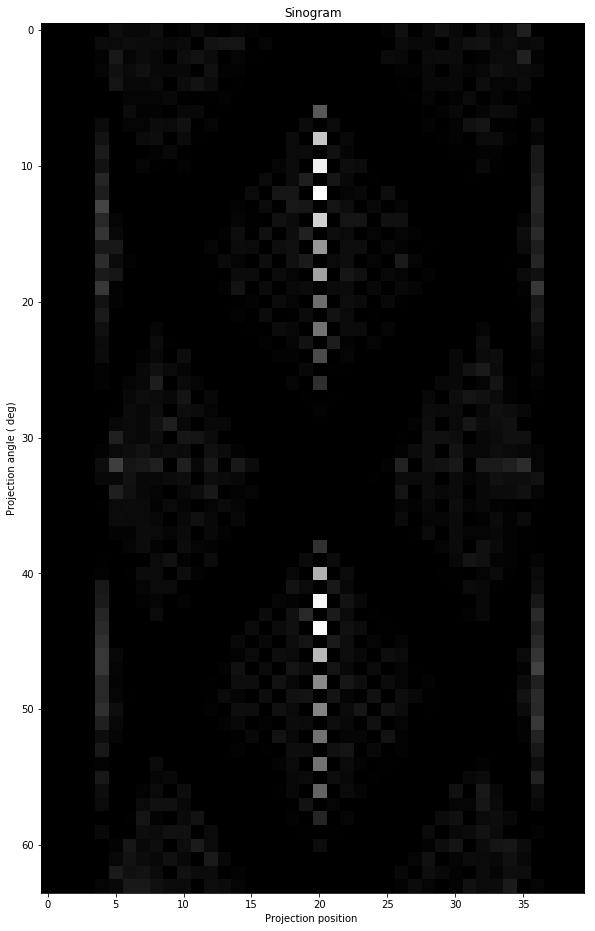

In [24]:
draw_sinogram(64,40)

In [ ]:
draw_sinogram_custom(32,40)

# len(sort_dat)